# Stack Overflow Developer Survey 2024: Comprehensive EDA Documentation

## Table of Contents
1. [Introduction](#introduction)
2. [Data Preparation](#data-preparation)
3. [Demographics Analysis](#demographics-analysis)
4. [Technology Landscape](#technology-landscape)
5. [Work Environment](#work-environment)
6. [Regional Analysis](#regional-analysis)
7. [Compensation Analysis](#compensation-analysis)
8. [Learning and Development](#learning-and-development)
9. [Cost of Living Integration](#cost-of-living-integration)
10. [Future Trends](#future-trends)
11. [Conclusion](#conclusion)

## Introduction

This document provides comprehensive documentation for the exploratory data analysis (EDA) performed on the Stack Overflow Annual Developer Survey 2024 dataset. The analysis examines multiple facets of the global developer ecosystem, including demographics, technology preferences, geographic trends, compensation patterns, and work environments.

**Dataset Sources:**
- [Primary dataset: Stack Overflow Annual Developer Survey 2024](https://survey.stackoverflow.co/)
- [Supplementary dataset: Cost of Living Index by Country 2024](https://www.kaggle.com/datasets/myrios/cost-of-living-index-by-country-by-number-2024)


### Libraries Used

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

### Initial Setup

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
sns.set_theme(style='ticks', context="talk")
palette="dark:b_r"
# Customize Matplotlib parameters for a clean look
plt.rcParams.update({
    # Fonts and sizes
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    "axes.titlesize": 18,
    "axes.labelsize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "figure.titlesize": 20,
    
    # Grid style
    "grid.color": "lightgray",
    "grid.linestyle": "--",
    
    # Remove top and right spines for a cleaner look
    "axes.spines.top": False,
    "axes.spines.right": False,
})

## Data Preparation

### **Data Loading** 

In [4]:
survey_df = pd.read_csv('./data/raw/survey_results_public.csv')
col_data = pd.read_csv('data/raw/Cost_of_Living_Index_by_Country_2024.csv')

In [5]:
survey_df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [6]:
survey_df.shape

(65437, 114)

## **Select columns from the dataset**

In [7]:
useful_columns = [
   # Core Demographics and Background
   'Age',
   'Country',
   'MainBranch',
   'YearsCode',
   'YearsCodePro',
   'EdLevel',
   'DevType',
   'Employment',
   'WorkExp',
   "ResponseId",
   # Work Environment
   'RemoteWork',
   'OrgSize',
   'Industry',
   
   # Compensation and Economics
   'CompTotal',
   'ConvertedCompYearly',
   'Currency',
   'JobSat',
   
   # Technology Ecosystem
   'LanguageHaveWorkedWith',
   'LanguageWantToWorkWith',
   'DatabaseHaveWorkedWith',
   'DatabaseWantToWorkWith',
   'WebframeHaveWorkedWith',
   'WebframeWantToWorkWith',
   'PlatformHaveWorkedWith',
   'PlatformWantToWorkWith',
   
   # Professional Development
   'LearnCode',
   'LearnCodeOnline',
   'BuildvsBuy',
   'PurchaseInfluence',
   "OpSysPersonal use",
   "OpSysProfessional use"

]

In [8]:
len(useful_columns)

31

In [9]:
df = survey_df [useful_columns].copy()

In [10]:
df.head(3)

,Age,Country,MainBranch,YearsCode,YearsCodePro,EdLevel,DevType,Employment,WorkExp,ResponseId,RemoteWork,OrgSize,Industry,CompTotal,ConvertedCompYearly,Currency,JobSat,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,LearnCode,LearnCodeOnline,BuildvsBuy,PurchaseInfluence,OpSysPersonal use,OpSysProfessional use
0,Under 18 years old,United States of America,I am a developer by profession,NaN,NaN,Primary/elementary school,NaN,"Employed, full-time",NaN,1,Remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Books / Physical media,NaN,NaN,NaN,NaN,NaN
1,35-44 years old,United Kingdom of Great Britain and Northern I...,I am a developer by profession,20,17,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time",17.0,2,Remote,NaN,NaN,NaN,NaN,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,NaN,NaN,MacOS;Windows,MacOS
2,45-54 years old,United Kingdom of Great Britain and Northern I...,I am a developer by profession,37,27,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Developer Experience,"Employed, full-time",NaN,3,Remote,NaN,NaN,NaN,NaN,NaN,NaN,C#,C#,Firebase Realtime Database,Firebase Realtime Database,ASP.NET CORE,ASP.NET CORE,Google Cloud,Google Cloud,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,NaN,NaN,Windows,Windows


In [11]:
df.shape

(65437, 31)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     65437 non-null  object 
 1   Country                 58930 non-null  object 
 2   MainBranch              65437 non-null  object 
 3   YearsCode               59869 non-null  object 
 4   YearsCodePro            51610 non-null  object 
 5   EdLevel                 60784 non-null  object 
 6   DevType                 59445 non-null  object 
 7   Employment              65437 non-null  object 
 8   WorkExp                 29658 non-null  float64
 9   ResponseId              65437 non-null  int64  
 10  RemoteWork              54806 non-null  object 
 11  OrgSize                 47480 non-null  object 
 12  Industry                28858 non-null  object 
 13  CompTotal               33740 non-null  float64
 14  ConvertedCompYearly     23435 non-null

Most columns have the data type object, either because they contain values of different types, or they contain empty values, which are represented `np.NaN`. It appears that every column contains some empty values, since the Non-Null count for every column is lower than the total number of rows (65437). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis. 

To make our analysis easier, let's convert some other columns into numeric data types, while ignoring any non-numeric value (they will get converted to NaNs)

### Data Type Conversion

In [13]:
# Converting experience columns to numeric
df['YearsCode'] = pd.to_numeric(df.YearsCode, errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df.YearsCodePro, errors='coerce')

### Key Helper Functions

In [14]:
# Function to split semicolon-separated responses and count frequencies
def count_items(column_series):
    # Drop missing values and join all responses
    all_responses = df['LanguageHaveWorkedWith'].dropna().str.split(';')
    flattened = [item.strip() for sublist in all_responses for item in sublist if item.strip() != '']
    return Counter(flattened)

# Function to count items in semicolon-separated strings
def count_database(series):
    all_items = []
    for entry in series.dropna():
        items = [item.strip() for item in entry.split(';')]
        all_items.extend(items)
    return Counter(all_items)

# Function to explode a multi-response column into individual rows
def explode_column(df, column):
    temp_df = df[[column, 'Country']].dropna().copy()
    temp_df[column] = temp_df[column].str.split(';')
    return temp_df.explode(column).assign(**{column: lambda x: x[column].str.strip()})

In [15]:
df.head()

,Age,Country,MainBranch,YearsCode,YearsCodePro,EdLevel,DevType,Employment,WorkExp,ResponseId,RemoteWork,OrgSize,Industry,CompTotal,ConvertedCompYearly,Currency,JobSat,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,LearnCode,LearnCodeOnline,BuildvsBuy,PurchaseInfluence,OpSysPersonal use,OpSysProfessional use
0,Under 18 years old,United States of America,I am a developer by profession,NaN,NaN,Primary/elementary school,NaN,"Employed, full-time",NaN,1,Remote,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Books / Physical media,NaN,NaN,NaN,NaN,NaN
1,35-44 years old,United Kingdom of Great Britain and Northern I...,I am a developer by profession,20.0,17.0,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Developer, full-stack","Employed, full-time",17.0,2,Remote,NaN,NaN,NaN,NaN,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,NaN,NaN,MacOS;Windows,MacOS
2,45-54 years old,United Kingdom of Great Britain and Northern I...,I am a developer by profession,37.0,27.0,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Developer Experience,"Employed, full-time",NaN,3,Remote,NaN,NaN,NaN,NaN,NaN,NaN,C#,C#,Firebase Realtime Database,Firebase Realtime Database,ASP.NET CORE,ASP.NET CORE,Google Cloud,Google Cloud,Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,NaN,NaN,Windows,Windows
3,18-24 years old,Canada,I am learning to code,4.0,NaN,Some college/university study without earning ...,"Developer, full-stack","Student, full-time",NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,MongoDB;MySQL;PostgreSQL;SQLite,MongoDB;MySQL;PostgreSQL,jQuery;Next.js;Node.js;React;WordPress,jQuery;Next.js;Node.js;React,Amazon Web Services (AWS);Fly.io;Heroku,Amazon Web Services (AWS);Vercel,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,NaN,NaN,NaN
4,18-24 years old,Norway,I am a developer by profession,9.0,NaN,"Secondary school (e.g. American high school, G...","Developer, full-stack","Student, full-time",NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,PostgreSQL;SQLite,PostgreSQL;SQLite,NaN,NaN,NaN,NaN,"Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,NaN,NaN,Other (please specify):,NaN


In [16]:
print(f"Dataset dimensions: {df.shape}")

Dataset dimensions: (65437, 31)


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     65437 non-null  object 
 1   Country                 58930 non-null  object 
 2   MainBranch              65437 non-null  object 
 3   YearsCode               59046 non-null  float64
 4   YearsCodePro            48704 non-null  float64
 5   EdLevel                 60784 non-null  object 
 6   DevType                 59445 non-null  object 
 7   Employment              65437 non-null  object 
 8   WorkExp                 29658 non-null  float64
 9   ResponseId              65437 non-null  int64  
 10  RemoteWork              54806 non-null  object 
 11  OrgSize                 47480 non-null  object 
 12  Industry                28858 non-null  object 
 13  CompTotal               33740 non-null  float64
 14  ConvertedCompYearly     23435 non-null

In [18]:
missing_values = df.isnull().sum()
print("Missing values by column:")
print(missing_values[missing_values > 0])

Missing values by column:
Country                    6507
YearsCode                  6391
YearsCodePro              16733
EdLevel                    4653
DevType                    5992
WorkExp                   35779
RemoteWork                10631
OrgSize                   17957
Industry                  36579
CompTotal                 31697
ConvertedCompYearly       42002
Currency                  18753
JobSat                    36311
LanguageHaveWorkedWith     5692
LanguageWantToWorkWith     9685
DatabaseHaveWorkedWith    15183
DatabaseWantToWorkWith    22879
WebframeHaveWorkedWith    20276
WebframeWantToWorkWith    26902
PlatformHaveWorkedWith    23071
PlatformWantToWorkWith    30905
LearnCode                  4949
LearnCodeOnline           16200
BuildvsBuy                22079
PurchaseInfluence         18031
OpSysPersonal use          7263
OpSysProfessional use     12464
dtype: int64


Let's clean these non values before we start any analysis. Sin

In [19]:
df.describe()

,YearsCode,YearsCodePro,WorkExp,ResponseId,CompTotal,ConvertedCompYearly,JobSat
count,59046.000000,48704.000000,29658.000000,65437.000000,3.374000e+04,2.343500e+04,29126.000000
mean,14.175998,10.739652,11.466957,32719.000000,2.963841e+145,8.615529e+04,6.935041
std,10.361047,8.935175,9.168709,18890.179119,5.444117e+147,1.867570e+05,2.088259
min,1.000000,1.000000,0.000000,1.000000,0.000000e+00,1.000000e+00,0.000000
25%,6.000000,4.000000,4.000000,16360.000000,6.000000e+04,3.271200e+04,6.000000
50%,11.000000,8.000000,9.000000,32719.000000,1.100000e+05,6.500000e+04,7.000000
75%,20.000000,15.000000,16.000000,49078.000000,2.500000e+05,1.079715e+05,8.000000
max,50.000000,50.000000,50.000000,65437.000000,1.000000e+150,1.625660e+07,10.000000


## **Demographics Analysis**

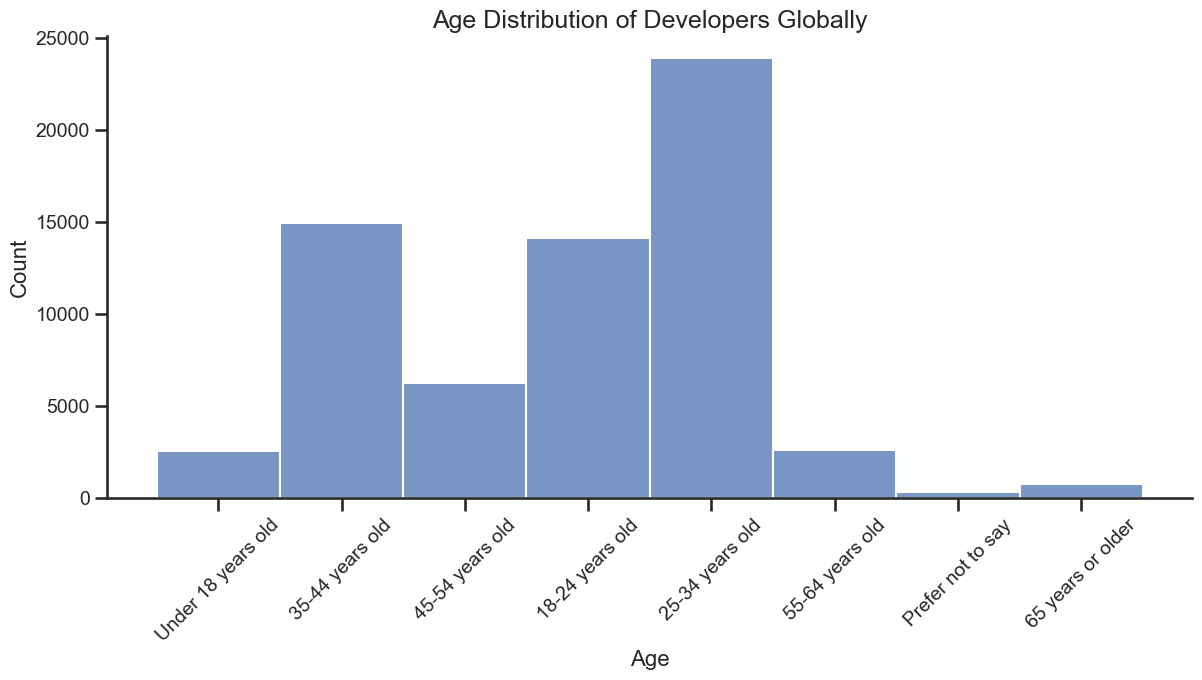

In [20]:
# 1. Age and Experience Distribution

# Plot Age Distribution
plt.figure(figsize=(14, 6))
sns.histplot(df['Age'].dropna(), bins=30)
plt.title('Age Distribution of Developers Globally')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Key Developer Age Distribution Insights**

* **25-34 age group dominates** the global developer landscape (~24,000 developers)
* Strong showing from **35-44 year olds** (~15,000) and **18-24 year olds** (~14,000)
* **Sharp decline after age 45**, with minimal representation in older age brackets
* **Mid-career professionals (25-44)** form the backbone of the global developer workforce
* Notable presence of **under-18 developers** signals early entry into the field
* Overall profile reveals a **younger-skewing profession** compared to other industries

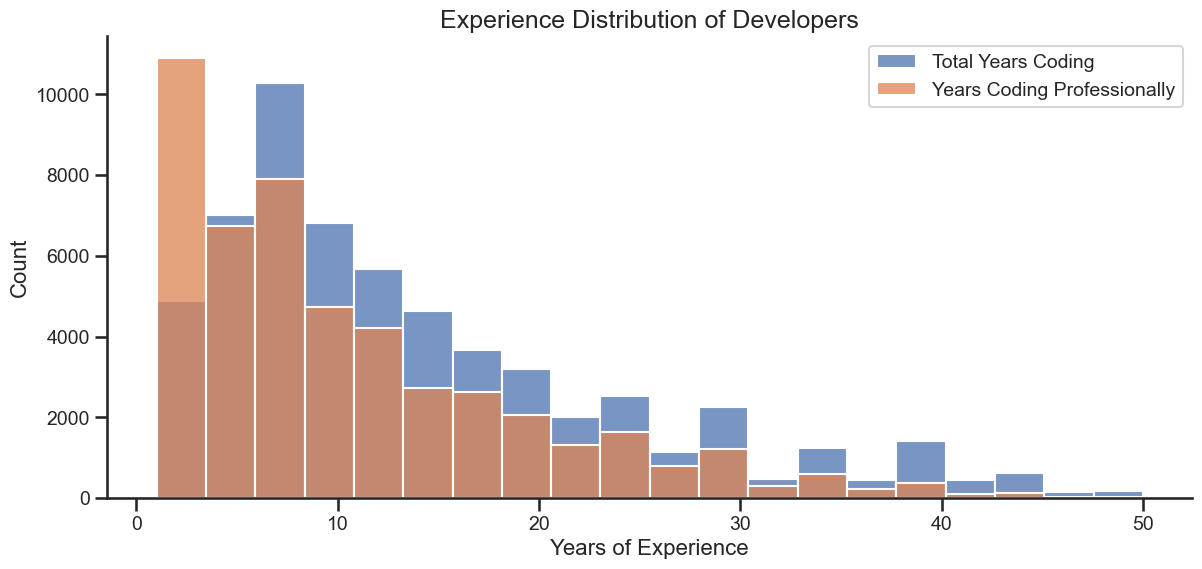

In [21]:
# Plot Experience Distributions for total and professional coding experience
plt.figure(figsize=(14, 6))
sns.histplot(df['YearsCode'].dropna(), bins=20, palette=palette, label='Total Years Coding')
sns.histplot(df['YearsCodePro'].dropna(), bins=20, palette=palette, label='Years Coding Professionally')
plt.title('Experience Distribution of Developers')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.legend()
plt.show()

**Key Developer Experience Insights**

* **Professional experience peaks at 0-1 years** (~23,000 developers), indicating a large influx of newcomers to the industry
* **Total coding experience peaks at 5-10 years** (~10,000 developers), revealing significant pre-professional learning periods
* **Consistent gap** between total and professional experience across all ranges shows developers typically code for years before entering the workforce
* **Sharp decline after 15 years** of experience in both categories highlights potential career transitions or industry retention challenges
* **Long-tail distribution** extends to 40+ years of total coding experience, representing a small but persistent group of veteran developers
* **Professional development pipeline** visible: many developers with 5+ years total experience have only 0-5 years professional experience

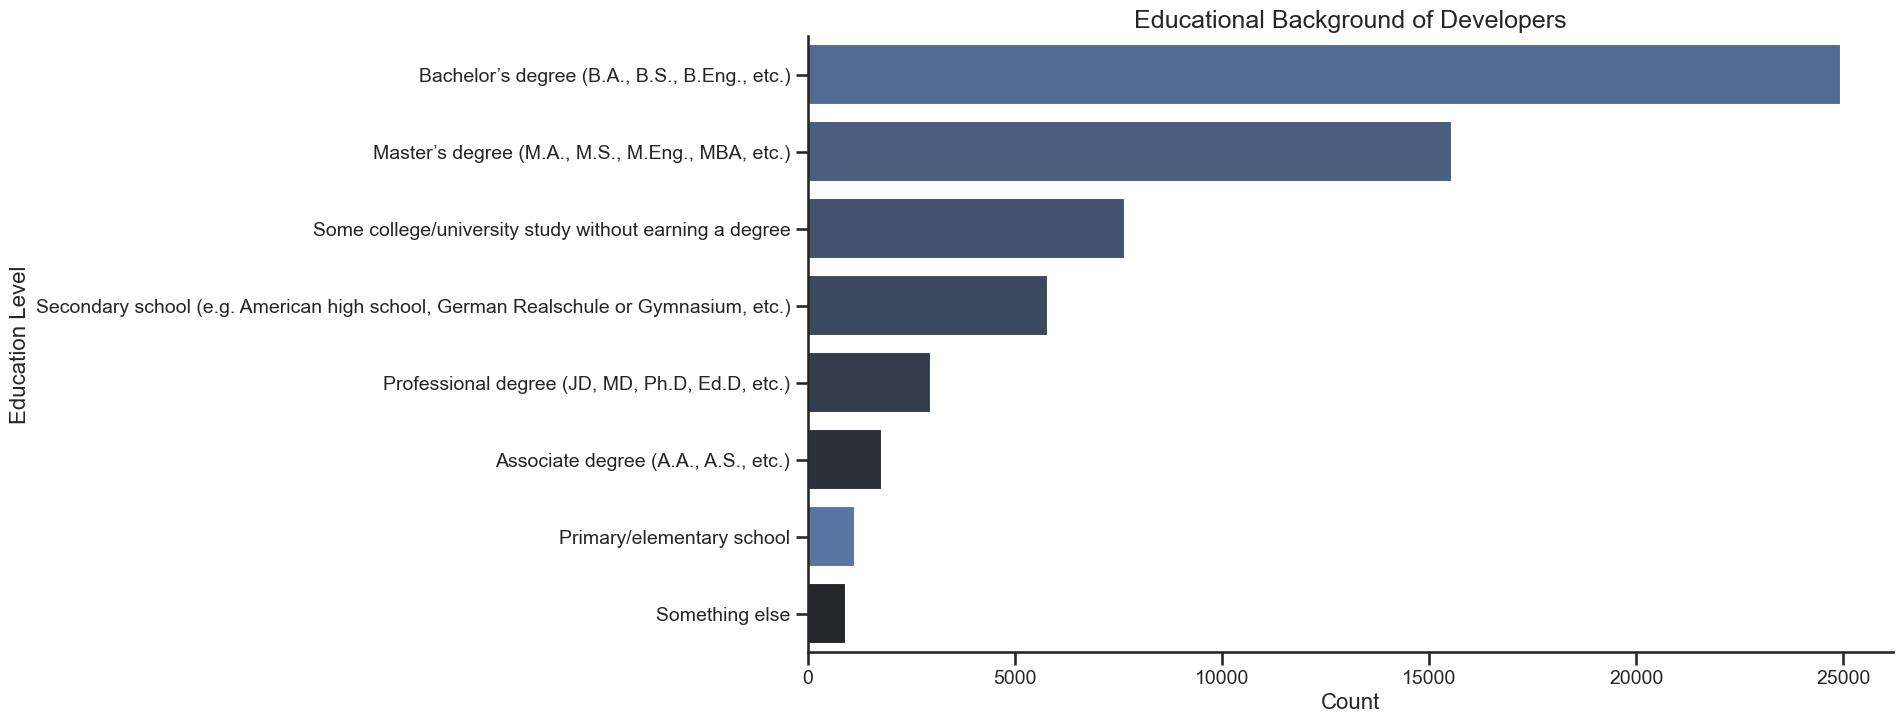

In [22]:
# Plot Educational Background diversity (EdLevel)
plt.figure(figsize=(14, 8))
sns.countplot(y='EdLevel', data=df, order=df['EdLevel'].value_counts().index, hue='EdLevel',palette=palette)
plt.title('Educational Background of Developers')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.legend().remove()
plt.show()


**Key Developer Education Insights**

* **Bachelor's degrees dominate** the field (~25,000 developers), representing the primary educational pathway
* **Master's degrees** are remarkably common (~15,000 developers), indicating high value placed on advanced education
* **Nearly 8,000 developers** have some college without completing a degree, showing formal credentials aren't universal barriers
* **Secondary education only** represents ~5,000 developers, demonstrating viable pathways exist without higher education
* **Professional degrees** (JD, MD, PhD) account for ~3,000 developers, suggesting career transitions from other specialized fields
* **Minimal representation** at associate degree and primary school levels indicates these are less common entry points

## **Technology Landscape Exploration**

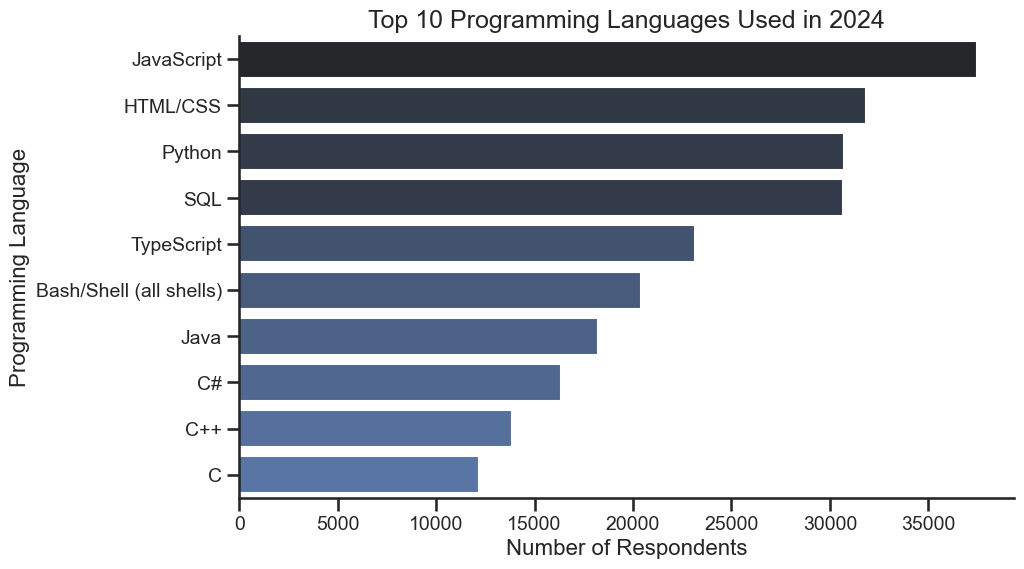

In [23]:
language_counts = count_items(df['LanguageHaveWorkedWith'])
lang_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Language', data=lang_df.head(10), hue='Count', palette=palette)
plt.title("Top 10 Programming Languages Used in 2024")
plt.xlabel("Number of Respondents")
plt.ylabel("Programming Language")
plt.legend().remove()
plt.show()

**Key Programming Language Insights 2024**

* **JavaScript dominates** with ~36,000 users, maintaining its position as the universal web language
* **HTML/CSS** follows closely (~31,000 users), reinforcing the continued prominence of web development
* **Python and SQL** show nearly identical adoption (~30,000 users each), highlighting the importance of both general-purpose programming and data management
* **TypeScript** (~24,000 users) has established itself as a mainstream language, reflecting the industry's move toward type safety
* **Traditional languages** (Java, C#, C++, C) remain relevant but show clear stratification in popularity
* **Bash/Shell** scripts (~20,000 users) demonstrate the continued importance of automation and DevOps skills
* **Clear tiers visible**: web technologies at top, followed by data/scripting languages, then compiled languages

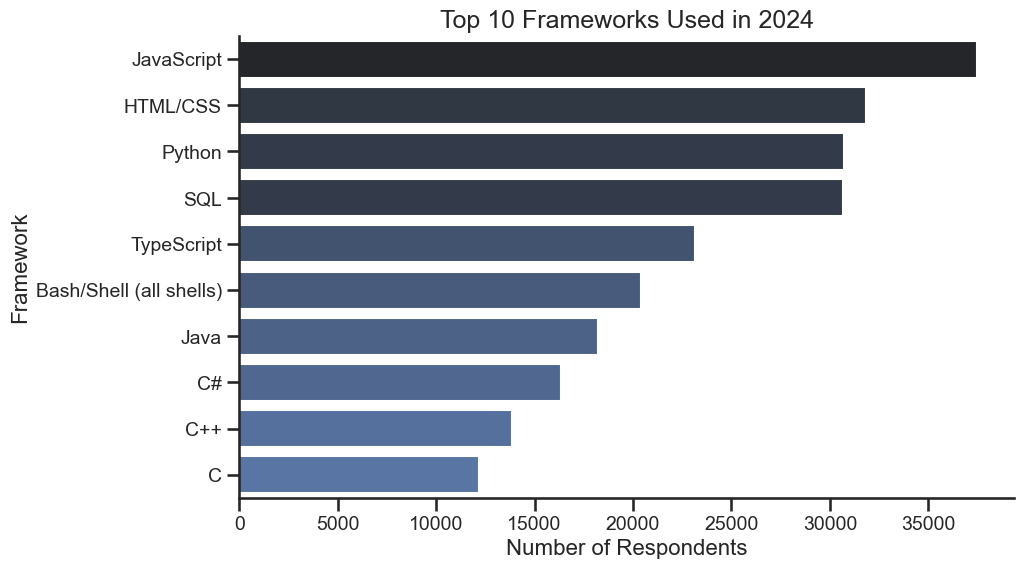

In [24]:
framework_counts = count_items(df['WebframeHaveWorkedWith'])
fw_df = pd.DataFrame(framework_counts.items(), columns=['Framework', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Framework', data=fw_df.head(10), hue='Count', palette=palette)
plt.title("Top 10 Frameworks Used in 2024")
plt.xlabel("Number of Respondents")
plt.ylabel("Framework")
plt.legend().remove()
plt.show()

**Key Framework Insights 2024**

* **Node.js dominates** (~20,000 users), establishing itself as the backbone of modern web development
* **React follows closely** (~19,000 users), confirming its position as the premier frontend framework
* **Clear two-tier structure**: Node.js/React form an elite tier with nearly double the users of other frameworks
* **jQuery persists** (~10,500 users) despite its age, demonstrating remarkable staying power in production environments
* **Next.js, Express, Angular, and ASP.NET CORE** cluster together (~8,000-9,500 users), forming a strong middle tier
* **Microsoft ecosystem** maintains significant presence with both ASP.NET CORE and ASP.NET in the top 10
* **Vue.js** (~7,500 users) and **Flask** (~6,000 users) round out the top 10, representing alternative options in their respective domains

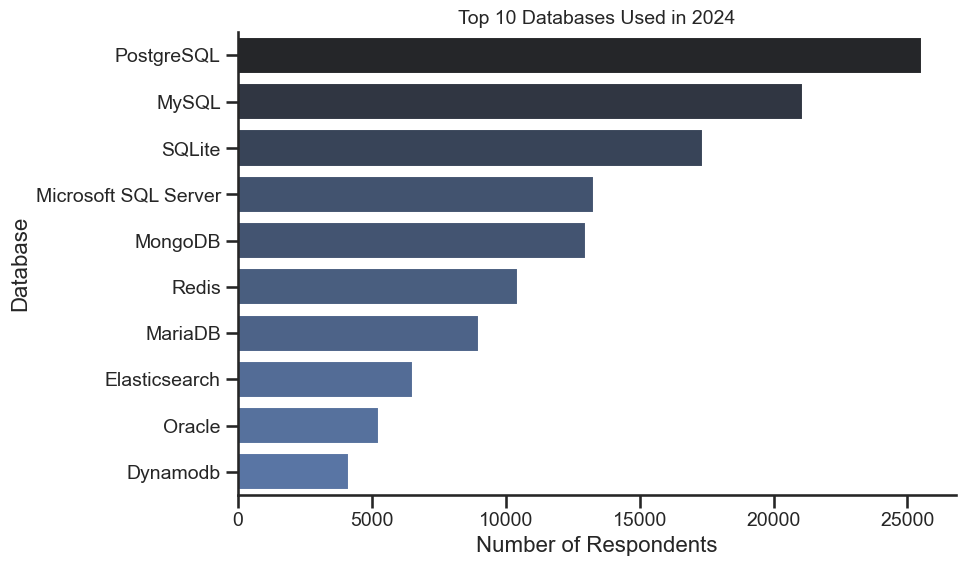

In [25]:
# Count databases
database_counts = count_database(df['DatabaseHaveWorkedWith'])

# Convert to DataFrame
database_df = pd.DataFrame(database_counts.items(), columns=['Database', 'Count'])
database_df = database_df.sort_values(by='Count', ascending=False)

# Plot Top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Database', data=database_df.head(10), hue='Count', palette=palette)
plt.title("Top 10 Databases Used in 2024", fontsize=14)
plt.xlabel("Number of Respondents")
plt.ylabel("Database")
plt.tight_layout()
plt.legend().remove()
plt.show()


**Key Database Insights 2024**

* **PostgreSQL leads decisively** (~25,000 users), cementing its position as the preferred database solution
* **MySQL remains strong** (~21,000 users) as a reliable second choice for relational database needs
* **SQLite's high adoption** (~17,000 users) highlights the importance of embedded database solutions
* **Relational databases dominate** with 5 of the top 7 spots (PostgreSQL, MySQL, SQLite, MS SQL Server, MariaDB)
* **MongoDB** (~13,000 users) maintains its position as the leading NoSQL option
* **Redis** (~11,000 users) shows strong adoption as the premier key-value store/caching solution
* **Significant drop-off** after the top 7, with Elasticsearch, Oracle, and DynamoDB seeing substantially lower usage

## **Work Environment and Developer Experience**

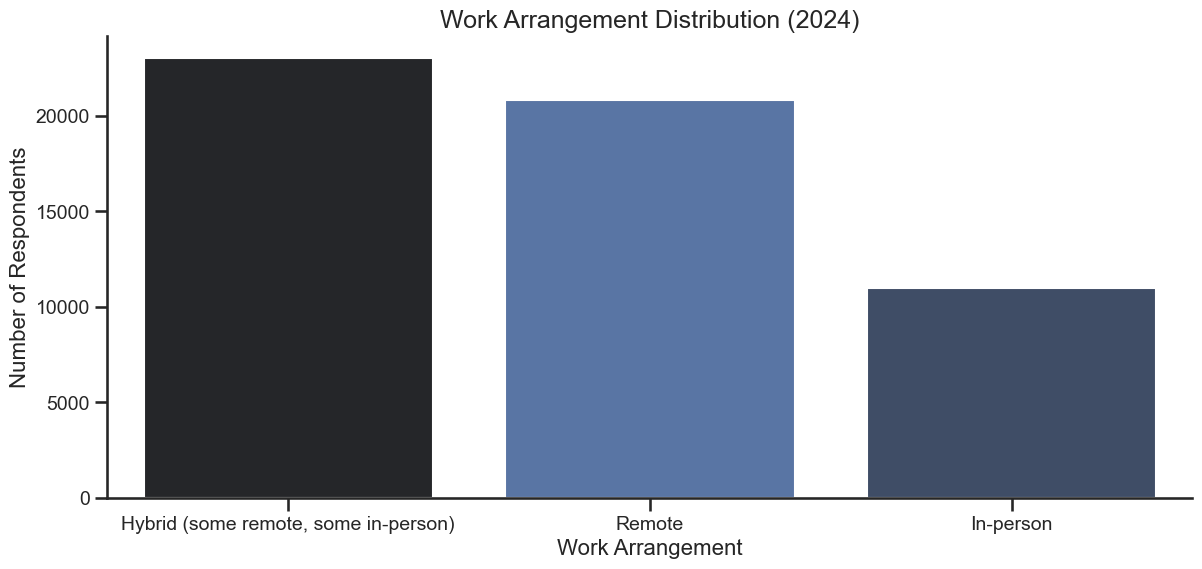

In [26]:
plt.figure(figsize=(14, 6))
sns.countplot(x='RemoteWork', data=df, order=df['RemoteWork'].value_counts().index, hue='RemoteWork', palette=palette)
plt.title("Work Arrangement Distribution (2024)")
plt.xlabel("Work Arrangement")
plt.ylabel("Number of Respondents")
plt.legend().remove()
plt.show()

**Key Work Arrangement Insights 2024**

* **Hybrid dominates** (~23,000 developers), emerging as the preferred balance between flexibility and collaboration
* **Remote work** follows closely (~21,000 developers), demonstrating strong continued demand for location independence
* **In-person arrangements** (~11,000 developers) represent a significant minority, half the size of hybrid arrangements
* **Flexible arrangements** (hybrid + remote) account for approximately 80% of all developer work setups
* **Traditional office-only** model has clearly shifted to minority status in the development world
* **Post-pandemic transformation** appears complete with new equilibrium favoring flexible work models

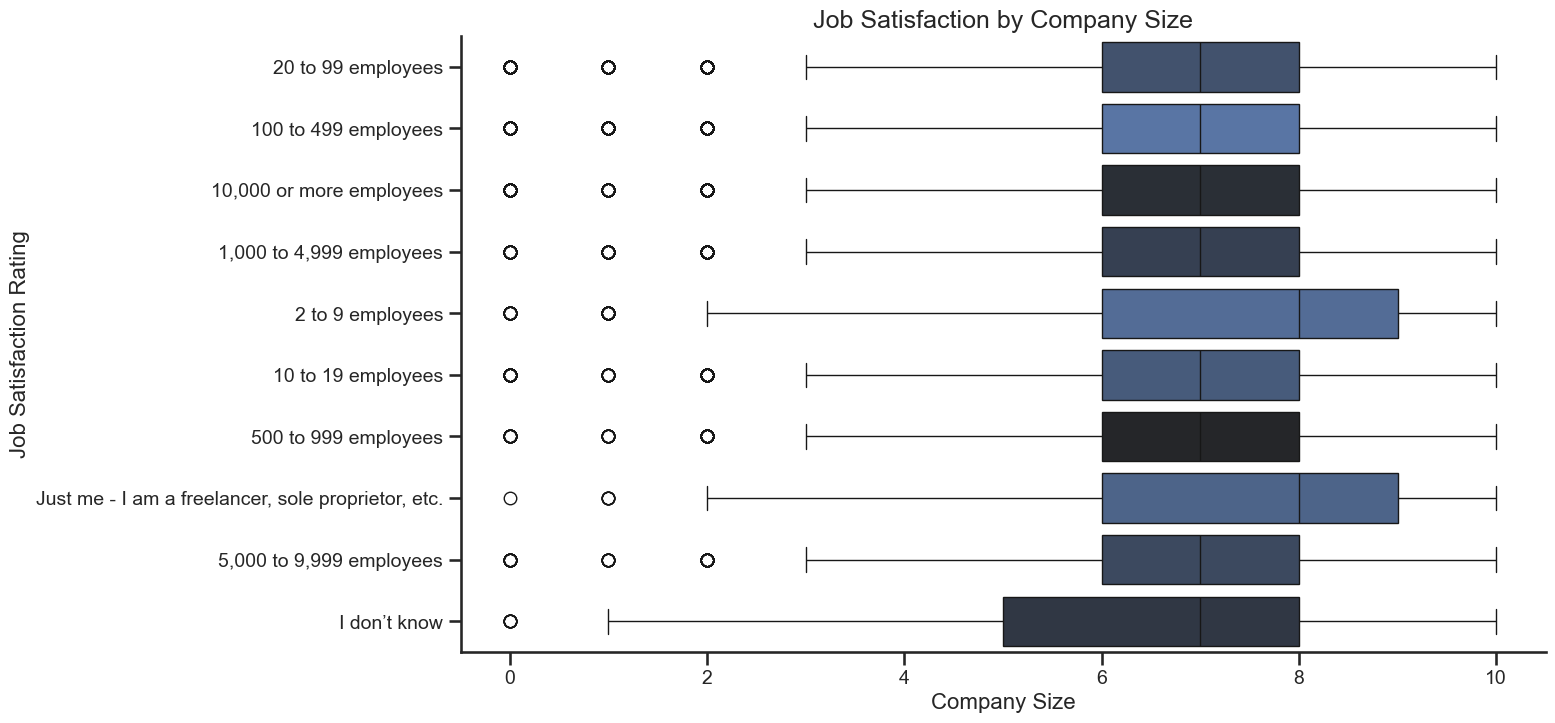

In [27]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='JobSat', y='OrgSize', data=df, order=df['OrgSize'].value_counts().index, 
            hue='OrgSize',
            palette=palette)
plt.title("Job Satisfaction by Company Size")
plt.xlabel("Company Size")
plt.ylabel("Job Satisfaction Rating")
plt.legend().remove()
plt.show()

**Key Job Satisfaction Insights**

* **Smallest organizations excel**: "Just me" freelancers (~8) and tiny companies (2-9 employees, ~8) report the highest satisfaction levels
* **Consistent satisfaction band**: Most company sizes cluster around 6-7 on the satisfaction scale
* **No clear downward trend** with increasing company size, challenging the notion that larger companies inherently reduce satisfaction
* **Comparable upper limits**: All company sizes show maximum satisfaction ratings near 10, indicating potential for excellence regardless of scale
* **Similar variability**: Wide satisfaction ranges exist across all company sizes, suggesting factors beyond company size strongly influence experiences
* **Those uncertain** about company size ("I don't know") report surprisingly high satisfaction (~7), above many defined categories

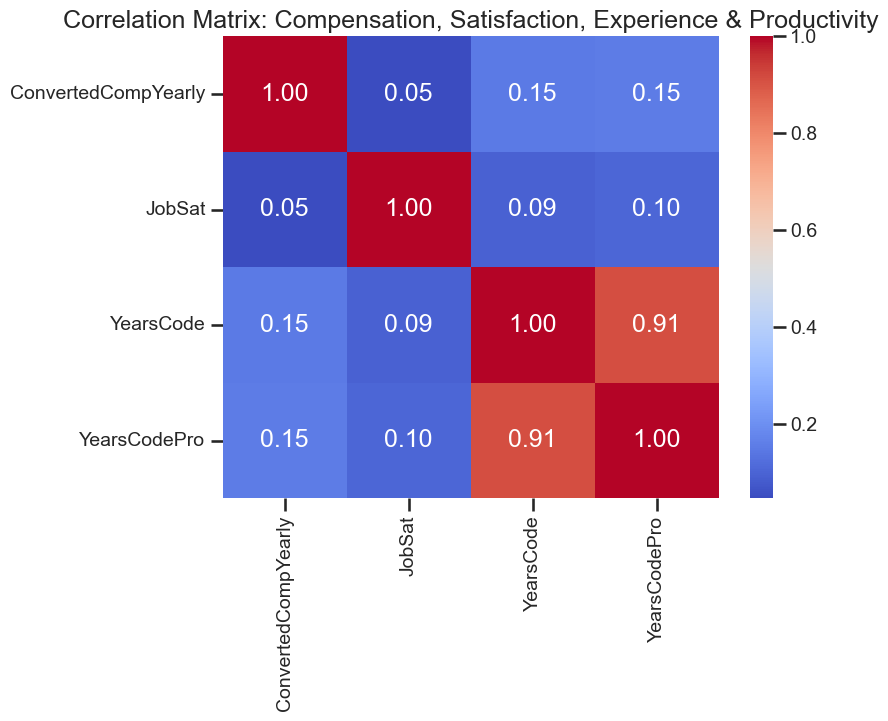

In [28]:
# List of numeric columns for correlation (adjust these names based on your dataset)
numeric_cols = ['ConvertedCompYearly', 'JobSat', 'YearsCode', 'YearsCodePro']

# If available, add productivity-related columns:
prod_cols = []
for col in ['TimeSearching', 'TimeAnswering', 'Frustration']:
    if col in df.columns:
        prod_cols.append(col)

all_numeric = numeric_cols + prod_cols

# Drop rows with missing values in these columns to compute correlation
corr_df = df[all_numeric].dropna()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Compensation, Satisfaction, Experience & Productivity")
plt.show()


**Key Correlation Insights**

* **Experience metrics are virtually identical**: Years coding and professional coding experience show near-perfect correlation (0.91)
* **Money doesn't buy happiness**: Compensation and job satisfaction show negligible correlation (0.05), challenging conventional wisdom
* **Experience yields modest financial returns**: Coding experience correlates weakly with compensation (0.15), suggesting limited reward for longevity
* **Experience barely influences satisfaction**: Years of experience shows minimal correlation with job satisfaction (0.09-0.10)
* **All variable pairs** show positive correlations, but most are surprisingly weak
* **Variables cluster into distinct groups**: experience metrics form one strongly correlated cluster, while compensation and satisfaction stand as independent variables

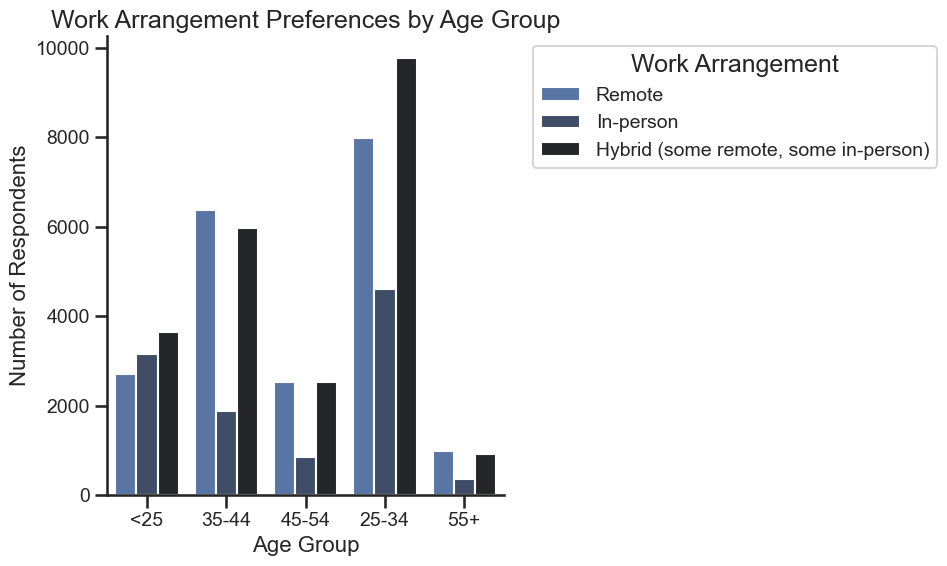

In [29]:
df['Age_cleaned'] = df['Age'].str.replace(' years old', '', regex=False).str.replace('Under ', '<', regex=False).str.strip()

# Step 2: Map cleaned age ranges to bins
age_bin_map = {
    '<18': '<25',
    '18-24': '<25',
    '25-34': '25-34',
    '35-44': '35-44',
    '45-54': '45-54',
    '55-64': '55+',
    '65 or older': '55+',
    'Prefer not to say': None
}

df['AgeBin'] = df['Age_cleaned'].map(age_bin_map)

# Step 3: Plot Work Arrangement by Age Bin
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='AgeBin', hue='RemoteWork', palette=palette)
plt.title("Work Arrangement Preferences by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Respondents")
plt.legend(title="Work Arrangement", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Key Work Arrangement Insights by Age**

* **Hybrid dominates the 25-34 bracket** (~9,700 respondents), establishing it as the overwhelming preference for this largest developer demographic
* **Remote work peaks with 35-44 year olds** (~6,300 respondents), suggesting strong appeal for mid-career professionals with established skills
* **In-person preference decreases with age** across most age groups, with consistently lower numbers compared to flexible options
* **Young developers (<25)** show more balanced preferences across all three arrangements
* **Dramatic preference shifts** occur between age groups, with the 25-34 cohort showing particularly strong hybrid preference
* **55+ group** has the lowest representation across all arrangements, but maintains the pattern of remote/hybrid preference over in-person
* **Overall participation** follows a bell curve with peak engagement in the 25-34 age group

## **Learning and Professional Development**

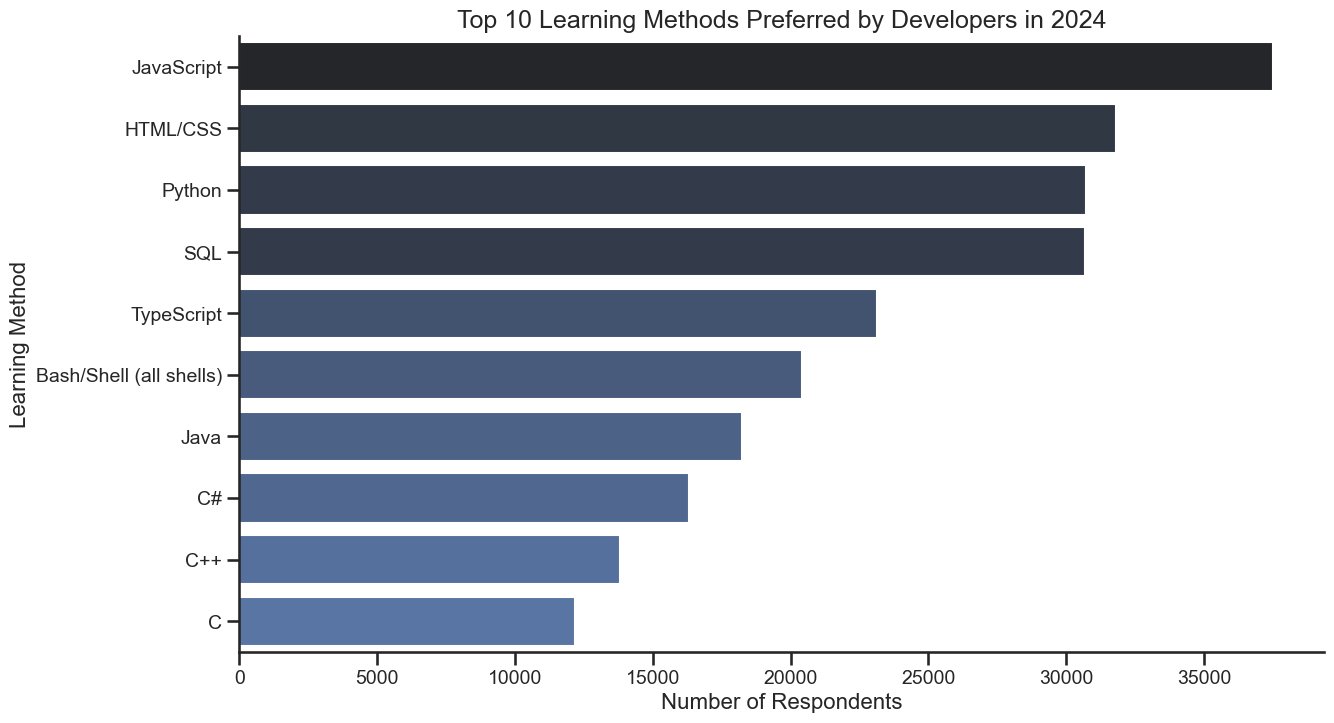

In [30]:
# We use the "LearnCode" column, which is assumed to include answers like "online courses", "books", "peer-learning", etc.
learning_methods_counts = count_items(df['LearnCode'])
learning_methods_df = pd.DataFrame(learning_methods_counts.items(), columns=['Method', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='Method', data=learning_methods_df.head(10), palette=palette, hue='Count')
plt.title("Top 10 Learning Methods Preferred by Developers in 2024")
plt.xlabel("Number of Respondents")
plt.ylabel("Learning Method")
plt.legend().remove()
plt.show()

**Key Developer Learning Insights 2024**

* **Informal online resources dominate** (~48,000 respondents), vastly outpacing all other learning methods
* **Traditional media endures** with books/physical media (~30,000) maintaining strong relevance despite digital alternatives
* **Formal education remains vital**: Both structured online courses (~30,000) and traditional schooling (~29,000) show robust adoption
* **Workplace learning** via on-the-job training (~26,000) and colleague interaction (~12,000) highlights the importance of professional environments
* **Clear three-tier structure**: informal online resources at top; formal education/books/training in middle; interpersonal and specialized approaches at bottom
* **Bootcamps** (~6,000) show modest adoption despite industry visibility, similar to learning from personal connections
* **Blended approach evident**: Most developers likely combine multiple methods, with online resources as the universal foundation

## **Developer Challenges and Pain Points**

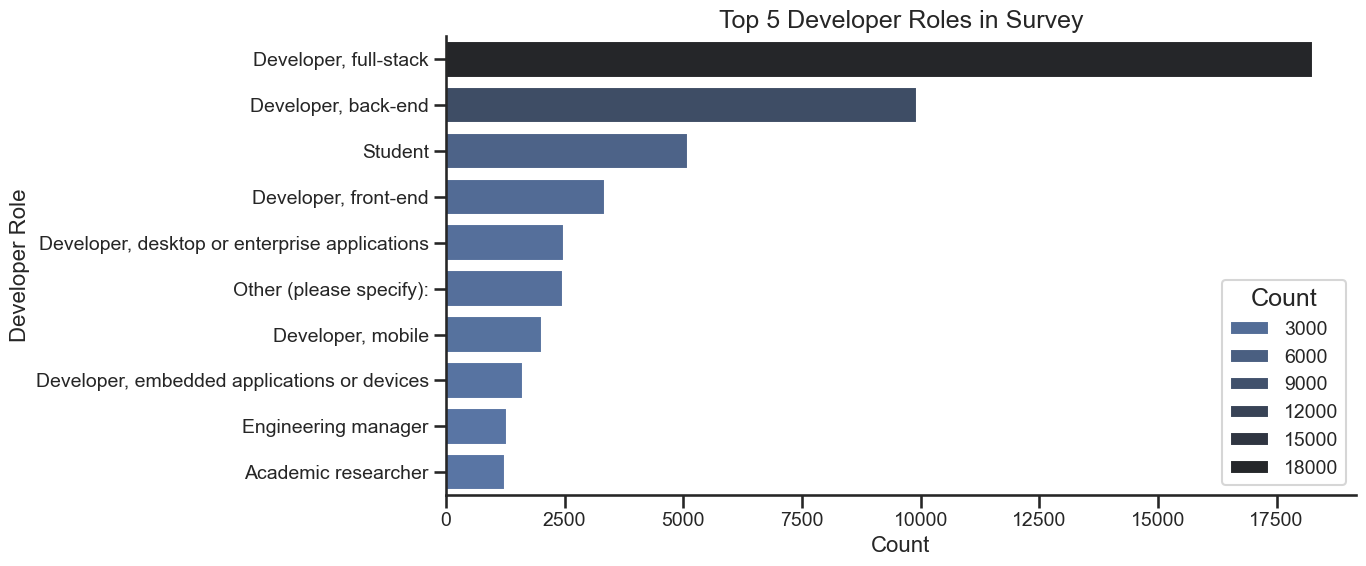

In [31]:
# Drop NaNs and flatten the list
dev_roles = df['DevType'].dropna().str.split(';')
flat_roles = [role.strip() for sublist in dev_roles for role in sublist]

# Count top 5 roles
top_roles = dict(Counter(flat_roles).most_common(10))
top_roles_df = pd.DataFrame(list(top_roles.items()), columns=['DevType', 'Count']).sort_values('Count', ascending=False)

# Step 2: Plot using barplot
plt.figure(figsize=(14, 6))
sns.barplot(data=top_roles_df, y='DevType', x='Count', hue='Count', palette=palette)
plt.title("Top 5 Developer Roles in Survey")
plt.xlabel("Count")
plt.ylabel("Developer Role")
plt.tight_layout()
plt.show()

**Key Developer Role Insights**

* **Full-stack dominates overwhelmingly** (~18,000 respondents), nearly double its closest competitor and reflecting the industry's demand for versatility
* **Backend specialists** (~10,000) maintain strong representation as the clear second most common role
* **Students represent a significant cohort** (~5,000), indicating robust pipeline of upcoming talent
* **Frontend specialists** (~3,000) show surprisingly lower numbers than backend, despite the web's dominance
* **Specialized domains** (desktop, mobile, embedded) each attract modest but meaningful numbers
* **Clear specialization hierarchy**: full-stack > backend > frontend > desktop/mobile > embedded
* **Management and research roles** appear at lower frequencies, suggesting most respondents remain in hands-on development

## **Industry and Company Size Analysis**

In [32]:
# Convert numeric fields
df['ConvertedCompYearly'] = pd.to_numeric(df['ConvertedCompYearly'], errors='coerce')
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df['YearsCodePro'] = df['YearsCodePro'].fillna(0)  # if missing, assume 0 for analysis

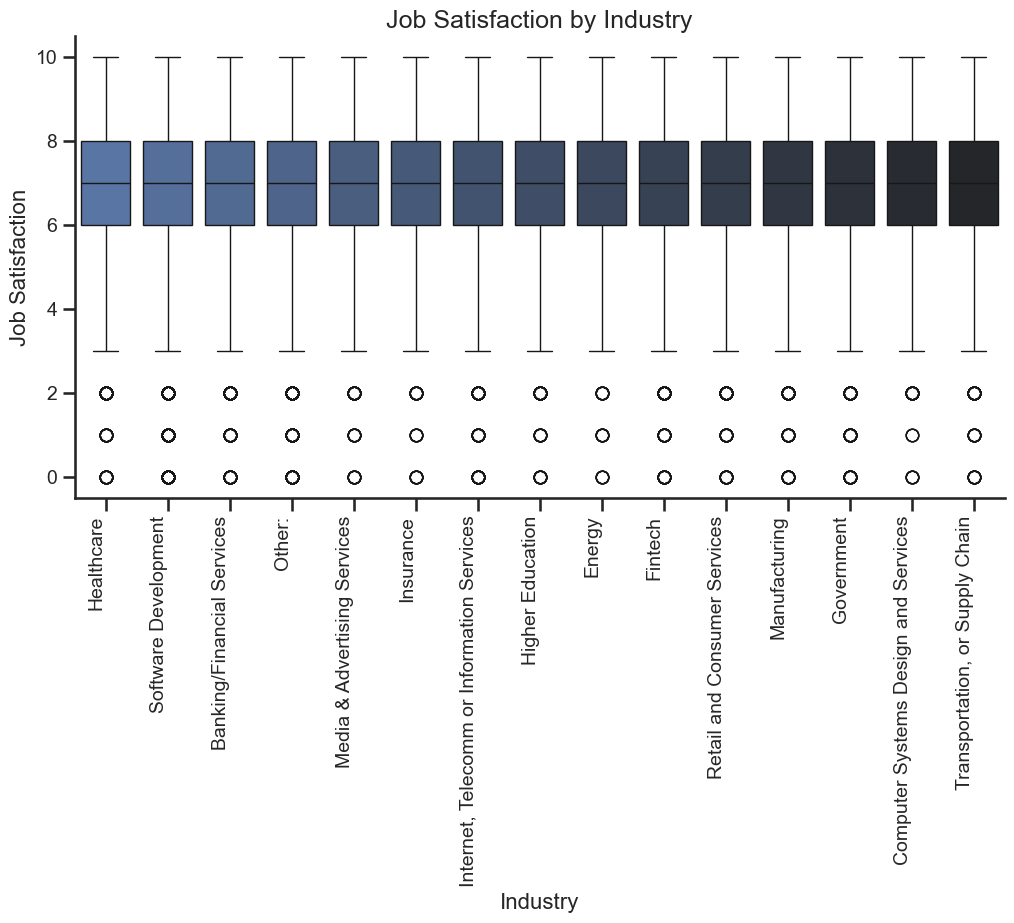

In [33]:
# Boxplot of Job Satisfaction by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='JobSat', data=df, hue='Industry', palette=palette)
plt.title("Job Satisfaction by Industry")
plt.xlabel("Industry")
plt.ylabel("Job Satisfaction")
plt.xticks(rotation=90, ha='right')
plt.legend().remove()
plt.show()

**Key Job Satisfaction Insights by Industry**

* **Remarkably consistent satisfaction levels** across all industries, with median scores clustered tightly around 7 out of 10
* **Minimal industry variation** contradicts conventional wisdom that certain sectors offer significantly better developer experiences
* **Healthcare and software development** show slightly higher median satisfaction among traditional tech-employing industries
* **Supply chain and manufacturing** industries trend marginally lower but remain within the same general satisfaction band
* **All industries share similar ranges** from outlier lows (~0-3) to highs (10), indicating individual experiences vary widely regardless of sector
* **Upper quartiles** consistently reach 8 across industries, suggesting high potential for satisfaction everywhere
* **Outliers exist in all sectors**, demonstrating that exceptional and poor experiences can be found regardless of industry

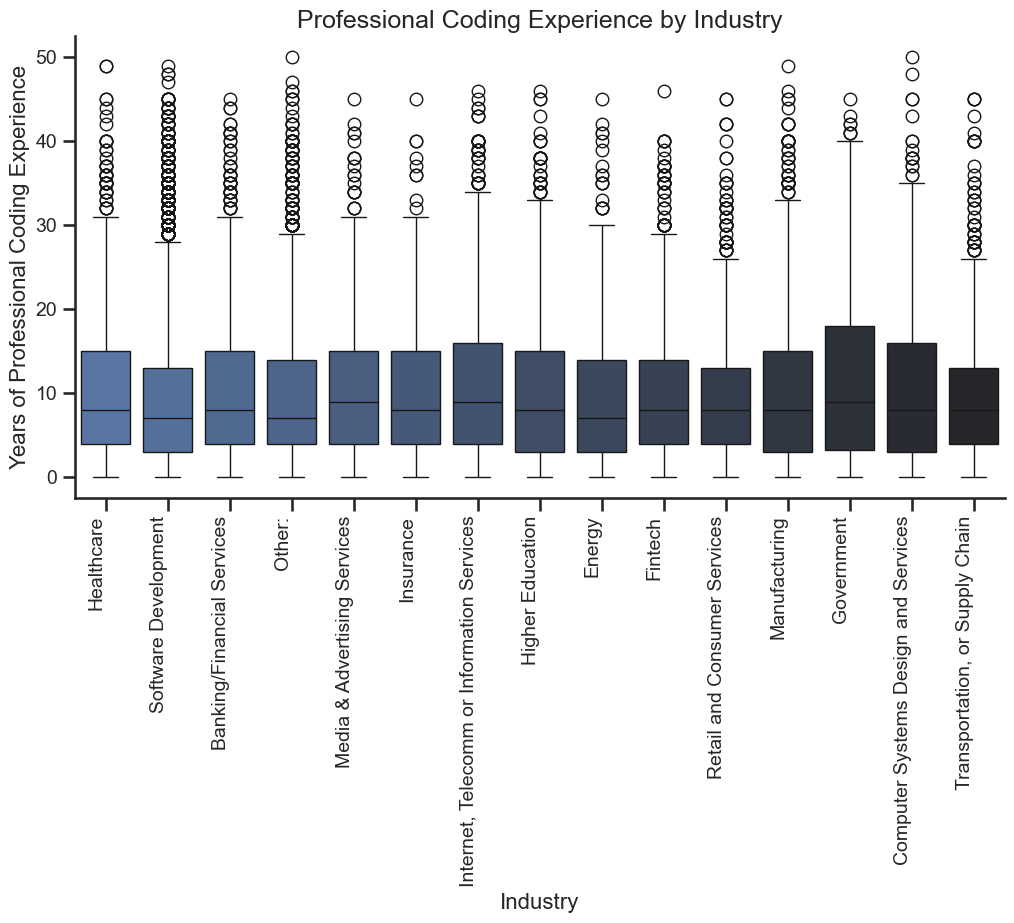

In [34]:
# Boxplot of Professional Coding Experience by Industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='Industry', y='YearsCodePro', data=df, hue='Industry', palette=palette)
plt.title("Professional Coding Experience by Industry")
plt.xlabel("Industry")
plt.ylabel("Years of Professional Coding Experience")
plt.xticks(rotation=90, ha='right')
plt.legend().remove()
plt.show()

**Key Coding Experience Insights by Industry**

* **Government sector leads** with highest median experience (~9 years), suggesting stability and longer tenure
* **Remarkably consistent medians** across industries (7-9 years), indicating similar experience distributions regardless of sector
* **All industries show extensive ranges** from novices (0-1 years) to veterans (40+ years)
* **Supply chain** shows the most compressed experience distribution, with fewer highly experienced outliers
* **Computer Systems Design** and **Government** display somewhat higher 75th percentiles, suggesting deeper senior talent pools
* **Software Development** shows surprisingly average experience levels despite being the core technology sector
* **Similar outlier patterns** across industries, with exceptional veterans (40-50 years experience) appearing in most sectors
* **First quartile consistently around 3-4 years** across industries, indicating similar junior developer representation

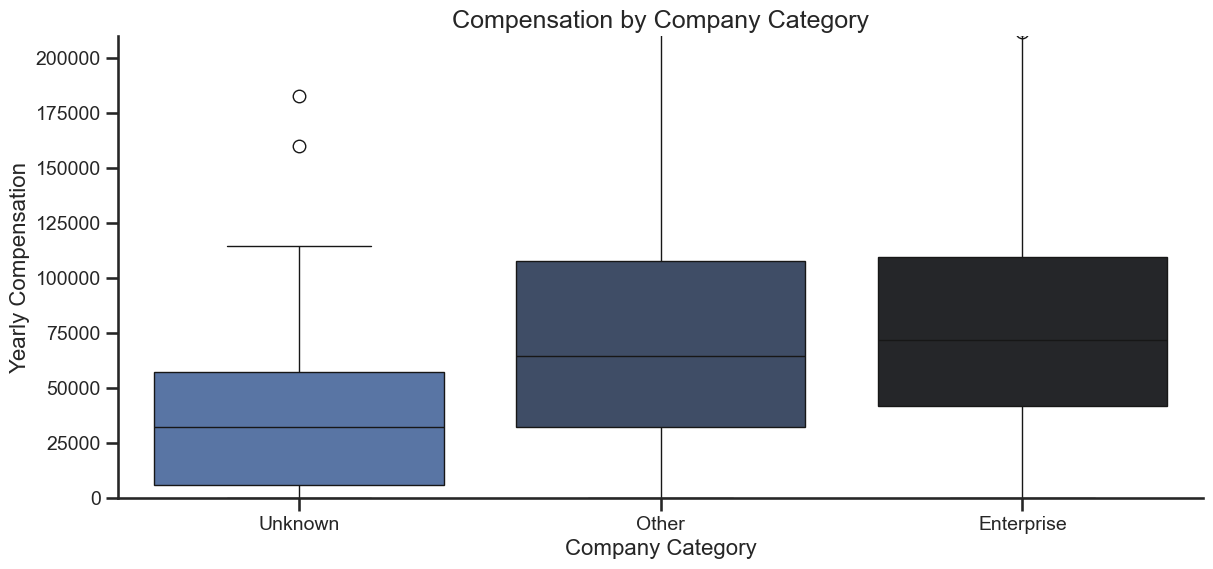

In [35]:
def categorize_company(org_size):
    if pd.isnull(org_size):
        return "Unknown"
    # Convert org_size to lower-case for matching and remove extra spaces.
    org_size = org_size.lower().strip()
    if any(x in org_size for x in ["1-10", "11-50"]):
        return "Startup"
    elif any(x in org_size for x in ["51-200", "201-500"]):
        return "Mid-sized"
    elif any(x in org_size for x in ["500", "1000", "5000", "5000+"]):
        return "Enterprise"
    else:
        return "Other"

# Create a new column with our categorization
df['CompanyCategory'] = df['OrgSize'].apply(categorize_company)

# Compare compensation by CompanyCategory using boxplots
plt.figure(figsize=(14, 6))
sns.boxplot(x='CompanyCategory', y='ConvertedCompYearly', data=df, hue='CompanyCategory', palette=palette)
plt.title("Compensation by Company Category")
plt.xlabel("Company Category")
plt.ylabel("Yearly Compensation")
plt.ylim(0, df['ConvertedCompYearly'].quantile(0.95))
plt.legend().remove()
plt.show()

**Key Compensation Insights by Company Category**

* **Enterprise and Other categories substantially outpay Unknown** companies, with median compensation nearly double (~$70K vs ~$35K)
* **Enterprise compensation** shows the highest median (~$72K) and a compressed range, suggesting more standardized pay scales
* **Unknown category** displays significant outliers reaching $180K, proving exceptional compensation is possible outside established categories
* **Other category** shows comparable medians to Enterprise but wider interquartile range, indicating more variable compensation practices
* **All categories** demonstrate wide overall ranges from entry-level (~$0-25K) to senior positions (~$110K+)
* **75th percentile threshold** in Enterprise and Other categories (~$110K) represents a significant jump from median levels
* **Enterprise lower quartile** starts higher (~$40K) than Unknown, indicating better compensation floors for entry positions

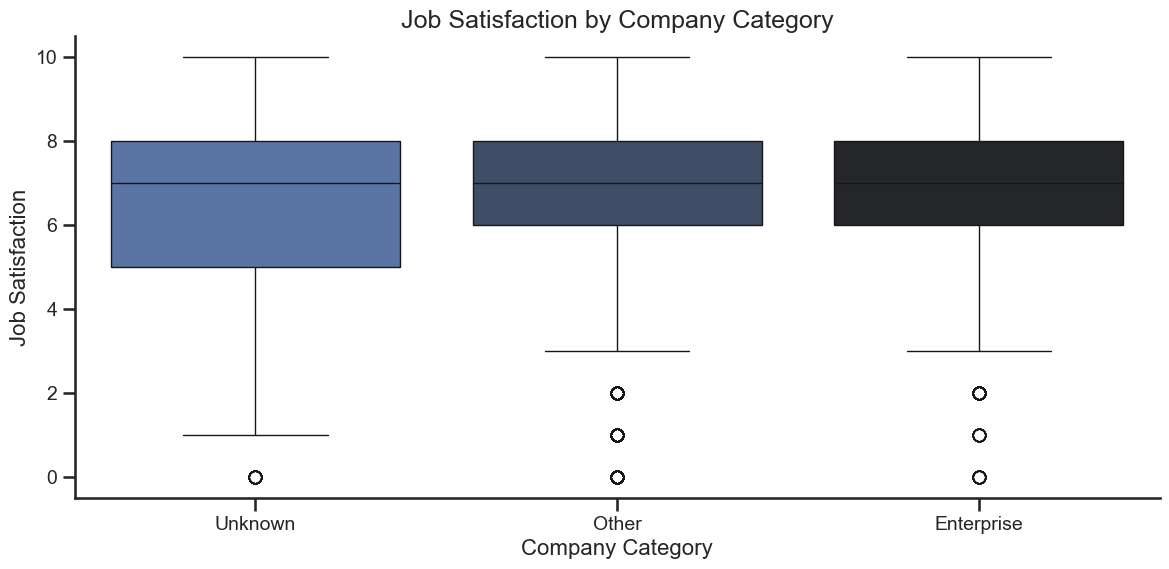

In [36]:
# Compare job satisfaction by CompanyCategory
plt.figure(figsize=(14, 6))
sns.boxplot(x='CompanyCategory', y='JobSat', data=df, hue='CompanyCategory', palette=palette)
plt.title("Job Satisfaction by Company Category")
plt.xlabel("Company Category")
plt.ylabel("Job Satisfaction")
plt.legend().remove()
plt.show()

**Key Job Satisfaction Insights by Company Category**

* **Nearly identical median satisfaction** (7 out of 10) across all company categories, challenging assumptions about company type driving happiness
* **Enterprise and Other categories** show more compressed lower ranges, suggesting fewer extremely dissatisfied employees
* **All categories reach maximum satisfaction** (10), indicating outstanding experiences are possible regardless of company type
* **Unknown category** displays wider lower range, suggesting slightly higher risk of dissatisfaction
* **Despite huge compensation differences** seen in the previous chart, satisfaction levels remain remarkably consistent
* **Outliers exist in all categories**, with some extremely dissatisfied individuals (0-2 rating) appearing across company types
* **First quartile consistency** (~6) across categories shows even less satisfied employees report moderate rather than poor experiences

## **Regional and Geographic Analysis**

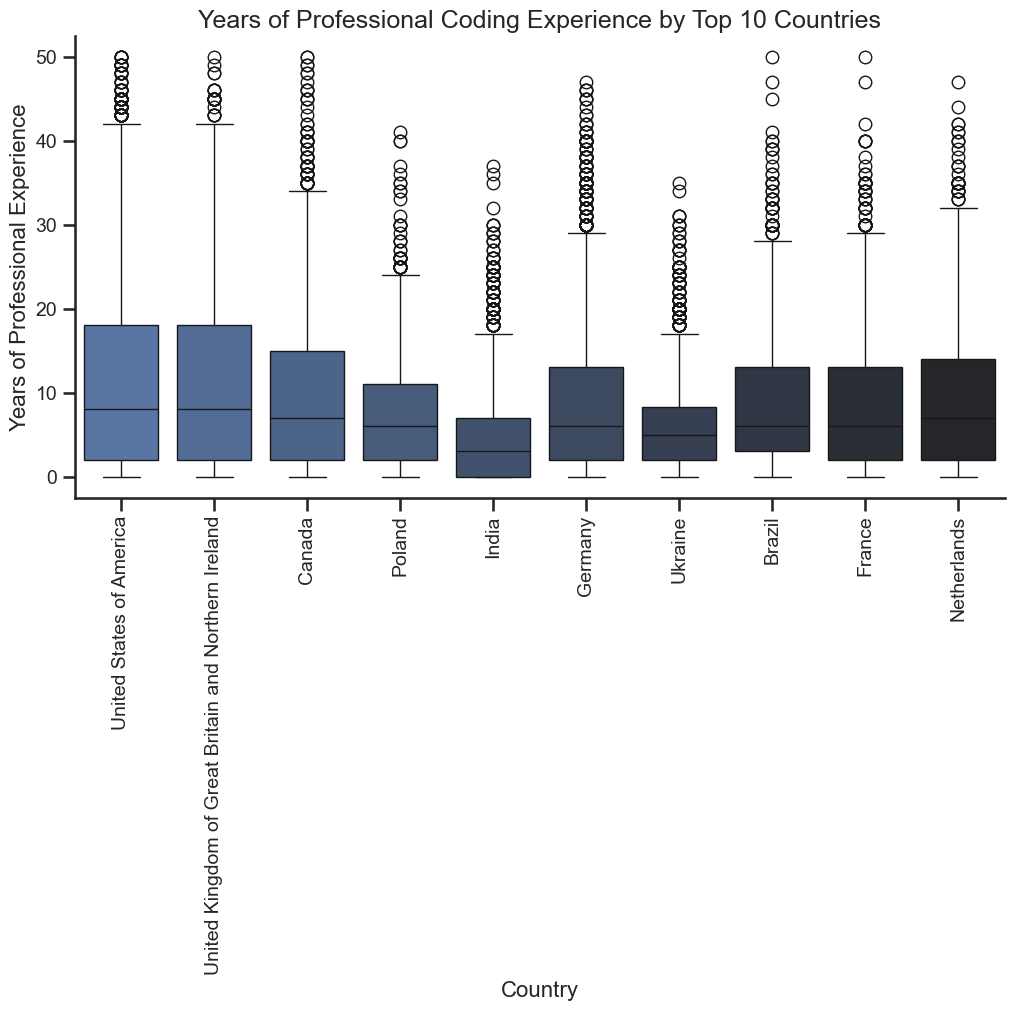

In [37]:
# Find top 10 countries with most responses
top_countries = df['Country'].value_counts().head(10).index.tolist()
df_top = df[df['Country'].isin(top_countries)]

# Boxplot: Years of Professional Experience by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='YearsCodePro', palette=palette, hue='Country',data=df_top)
plt.title("Years of Professional Coding Experience by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Years of Professional Experience")
plt.xticks(rotation=90)
plt.show()

**Key Coding Experience Insights by Country**

* **US and UK lead with deepest experience pools** (widest interquartile ranges and highest medians ~8 years), reflecting their mature tech industries
* **Netherlands shows highest median** (~9 years) among continental European nations, suggesting greater professional stability
* **India displays the youngest developer workforce** (median ~3 years), indicating its position as an emerging tech power with rapid workforce growth
* **Poland and Ukraine** show narrower experience bands and lower medians (~5-6 years), representing growing tech hubs with newer talent pools
* **All countries have veteran outliers** (40+ years experience), demonstrating global presence of programming pioneers
* **Brazil, France, and Germany** occupy the middle ground (~6-7 year medians), balancing established and emerging talent
* **Canada's distribution** suggests a mix of newer developers and established professionals, with wider range than most European countries

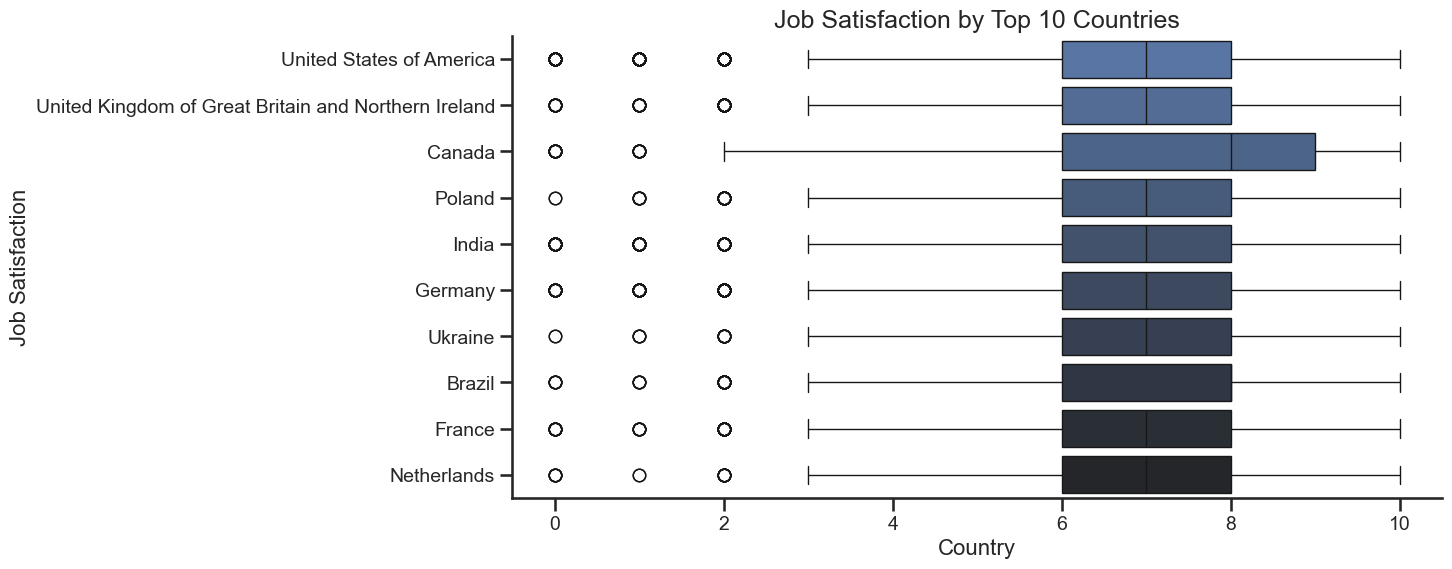

In [38]:
# Boxplot: Job Satisfaction by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSat', y='Country', palette=palette,hue='Country',data=df_top)
plt.title("Job Satisfaction by Top 10 Countries")
plt.xlabel("Country")
plt.ylabel("Job Satisfaction")
plt.show()

**Key Job Satisfaction Insights by Country**

* **Canada stands out** with notably higher median satisfaction (~8) and elevated lower quartile, suggesting better overall developer experiences
* **Remarkably consistent satisfaction levels** across other countries (medians ~7), transcending economic and cultural differences
* **All countries show identical maximum ratings** (10) and similar outlier patterns, indicating exceptional experiences exist everywhere
* **Minimal variation in ranges** among most countries, with consistent lower quartiles (~6) and upper quartiles (~8)
* **Developer satisfaction appears geography-agnostic**, with little correlation to country development status or tech industry maturity
* **Universal presence of outliers** (0-2 rating) in all countries demonstrates that poor experiences exist across all geographies
* **No clear East-West or North-South patterns**, with similar satisfaction distributions across North America, Europe, and Asia

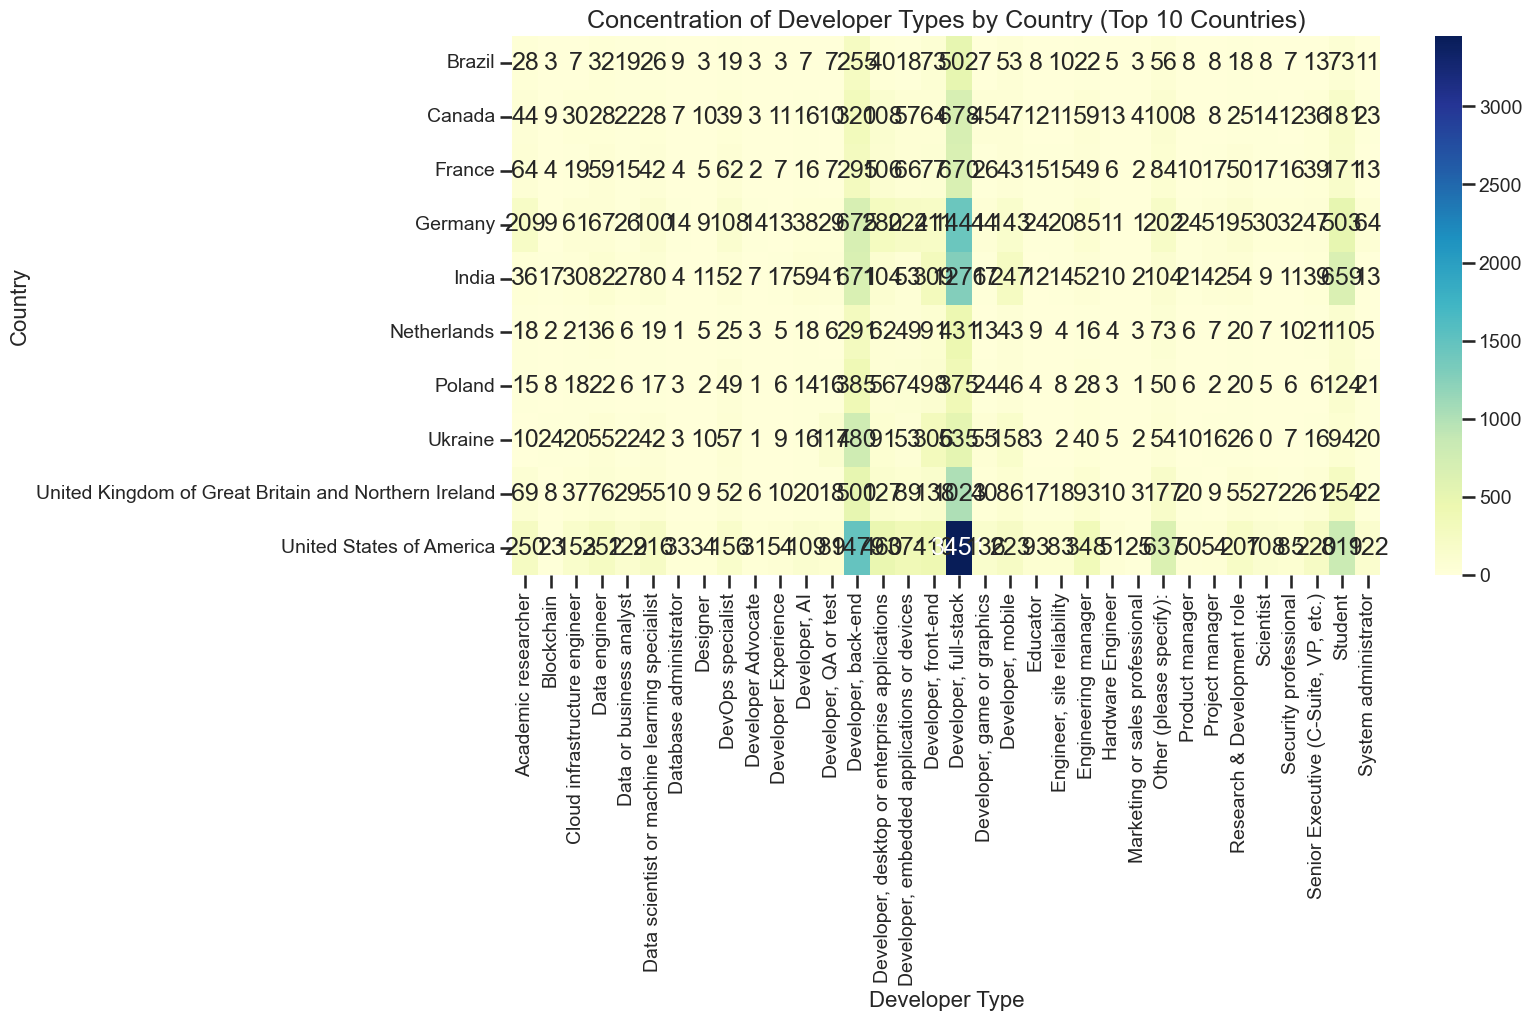

In [39]:
df_devtype = explode_column(df, 'DevType')

# Get counts per Country and DevType
devtype_counts = df_devtype.groupby(['Country', 'DevType']).size().reset_index(name='Count')

# For a clear view, restrict to the top 5 countries with highest responses:
devtype_top = devtype_counts[devtype_counts['Country'].isin(top_countries)]

# Pivot table for heatmap: rows=Country, columns=DevType, values=Count
pivot_devtype = devtype_top.pivot(index='Country', columns='DevType', values='Count').fillna(0)

plt.figure(figsize=(14, 7))
sns.heatmap(pivot_devtype, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Concentration of Developer Types by Country (Top 10 Countries)")
plt.xlabel("Developer Type")
plt.ylabel("Country")
plt.show()

**Key Developer Type Distribution Insights**

* **Full-stack development dominates globally**, appearing as the highest concentration role across most countries
* **United States shows exceptional diversity** with strong representation across nearly all developer types
* **India displays notable strength** in back-end roles and data science, highlighting its specialized talent pools
* **Developer, mobile** shows high concentration in Germany, reflecting European leadership in this sector
* **Ukraine demonstrates specialized focus** on specific roles rather than broad distribution, with notable strength in front-end development
* **Database administrators** show surprisingly consistent representation across countries, indicating universal demand
* **DevOps specialists** appear more concentrated in Western countries (US, UK, Germany) compared to emerging markets
* **Specialized roles** (security, embedded applications, QA) show lower but consistent distribution across all countries

In [40]:
# Function to explode multi-response columns
def explode_column(df, col, delimiter=';'):
    df = df.copy()
    df[col] = df[col].fillna('')
    df[col] = df[col].astype(str).str.split(delimiter)
    return df.explode(col)

# Explode LanguageHaveWorkedWith column while keeping Country
df_lang = explode_column(df[['Country', 'LanguageHaveWorkedWith']], 'LanguageHaveWorkedWith')

# Top 5 countries by response count
top_5_countries = df['Country'].value_counts().head(6).index.tolist()

# Filter data to include only top countries
lang_subset = df_lang[df_lang['Country'].isin(top_5_countries)]

# Group and count language usage
lang_counts = lang_subset.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

lang_counts['Percent'] = lang_counts.groupby('Country')['Count']\
    .transform(lambda x: (x / x.sum()) * 100)

top_langs_by_country = lang_counts.groupby('Country', group_keys=False).apply(
    lambda x: x.sort_values('Percent', ascending=False).head(10)
)

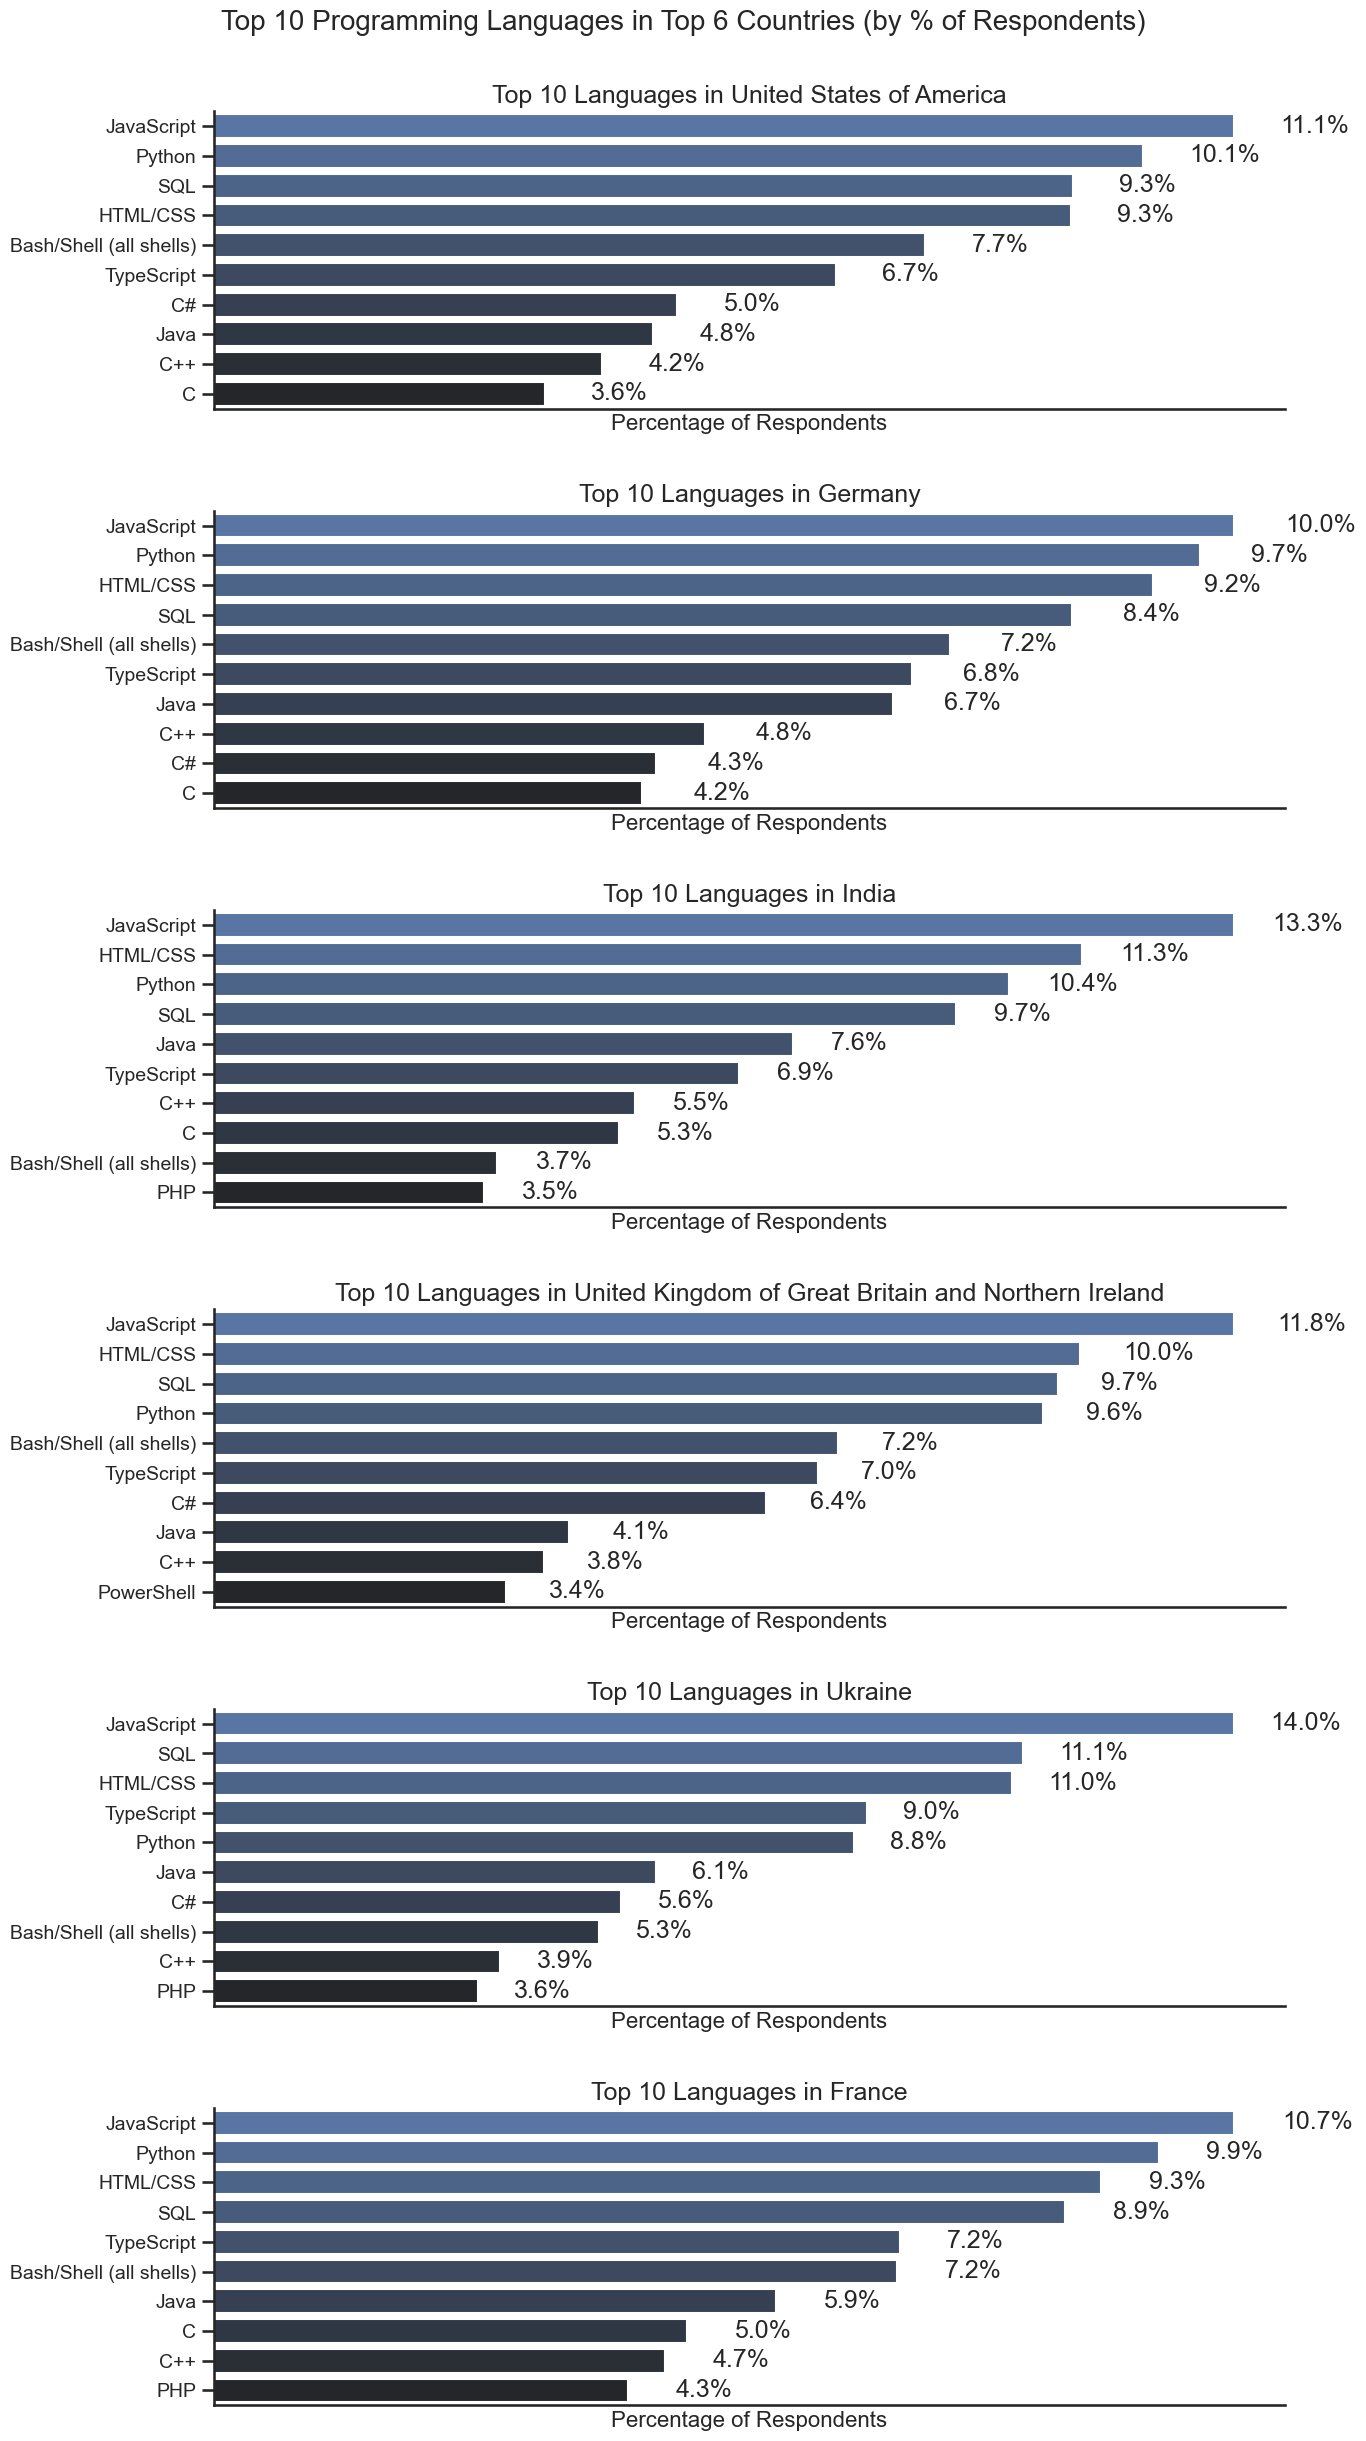

In [41]:
# Step 3: Plot
fig, ax = plt.subplots(6, 1, figsize=(14, 24))
axes = ax.flatten()

for i, country in enumerate(top_5_countries):
    df_country = top_langs_by_country[top_langs_by_country['Country'] == country]

    sns.barplot(
        data=df_country,
        x='Percent',
        y='LanguageHaveWorkedWith',
        ax=axes[i],
        palette=palette
    )

    if i != len(top_langs_by_country) - 1:
        axes[i].set_xticks([])

    axes[i].set_title(f"Top 10 Languages in {country}")
    axes[i].set_xlabel("Percentage of Respondents")
    axes[i].set_ylabel("")

    # Annotate bars with percentages
    for j, perc in enumerate(df_country['Percent']):
        axes[i].text(perc + 0.5, j, f"{perc:.1f}%", va='center')

plt.tight_layout(h_pad=2)
fig.suptitle("Top 10 Programming Languages in Top 6 Countries (by % of Respondents)", y=1.02)
plt.show()

**Key Programming Language Insights by Country (Percentage)**

* **JavaScript dominates universally** but with varying intensity: highest in Ukraine (14.0%) and India (13.3%), lower in Germany (10.0%)
* **India shows strongest preference polarization** with top two languages (JavaScript 13.3%, HTML/CSS 11.3%) capturing nearly 25% of all responses
* **Ukraine demonstrates unique ranking pattern**: SQL (11.1%) ranks second, ahead of HTML/CSS (11.0%), unlike all other countries
* **Python's importance varies significantly** by region: strong in US (10.1%) and France (9.9%), but notably weaker in Ukraine (8.8%)
* **TypeScript adoption highest in Ukraine** (9.0%) compared to other countries, suggesting stronger typed JavaScript preference
* **UK and US share similar distributions** with nearly identical percentage rankings across their top languages
* **Regional technology ecosystems visible**:
  - **PHP appears only** in Ukraine, India, and France's top 10
  - **PowerShell unique** to UK's list at 3.4%
  - **Java maintains stronger position** in India (7.6%) than Western nations
* **C-family languages show consistent patterns**: C# ranks higher than C++ in US, UK, Germany and Ukraine, while France ranks C above C#

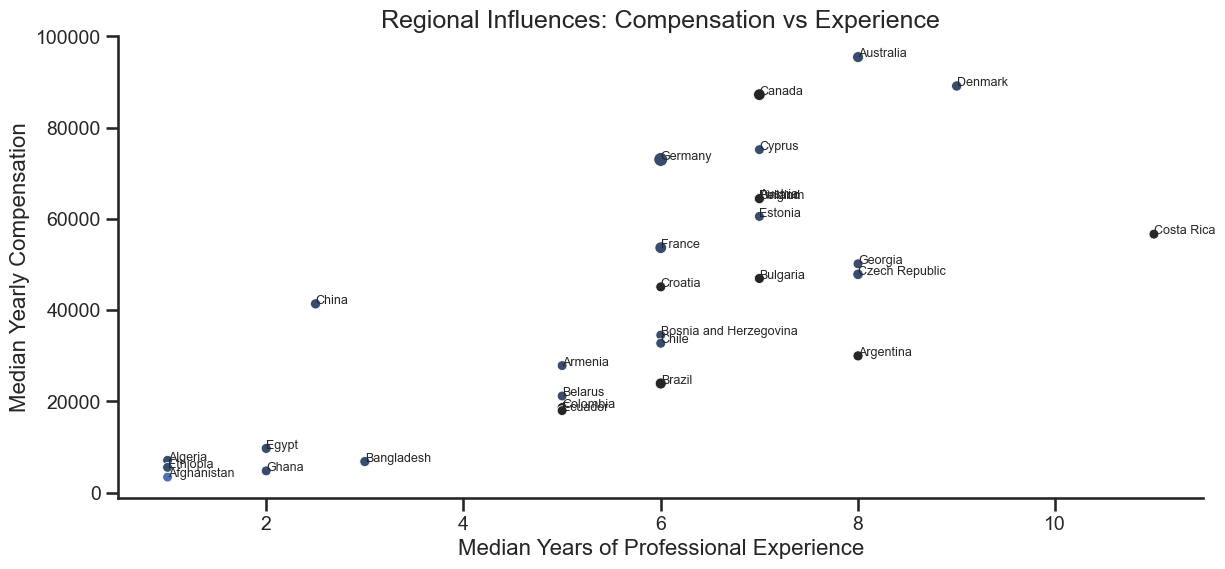

In [42]:
# In this part we compare median compensation and experience by Country.
regional_stats = df.groupby('Country').agg(
    MedianCompensation=('ConvertedCompYearly', 'median'),
    MedianExperience=('YearsCodePro', 'median'),
    Count=('ResponseId', 'count'),
    MedianJobSat=('JobSat', 'median')
).reset_index()

# Filter for countries with sufficient data (e.g., at least 100 responses)
regional_stats = regional_stats[regional_stats['Count'] >= 50]
regional_stats = regional_stats.head(30)
# Create a scatter plot: Compensation vs Experience, colored by median job satisfaction
plt.figure(figsize=(14, 6))
scatter = sns.scatterplot(x='MedianExperience', y='MedianCompensation', hue='MedianJobSat',
                          size='Count', sizes=(50, 100), data=regional_stats, palette=palette)
plt.title("Regional Influences: Compensation vs Experience")
plt.xlabel("Median Years of Professional Experience")
plt.ylabel("Median Yearly Compensation")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.)
for idx, row in regional_stats.iterrows():
    plt.text(row['MedianExperience'], row['MedianCompensation'], row['Country'], fontsize=9)
plt.legend().remove()
plt.show()


**Regional Compensation vs Experience Insights**

* **Geography trumps experience** in determining developer compensation, with location having far greater impact than years of professional coding
* **Nordic/Oceania premium** evident with Australia (~$95K) and Denmark (~$90K) commanding top compensation despite similar experience to lower-paid regions
* **Costa Rica emerges as anomaly** with highest median experience (~10.5 years) yet mid-tier compensation (~$57K)
* **Stark regional stratification** creates distinct compensation bands regardless of experience:
  - **Top tier** ($85K-95K): Australia, Denmark, Canada
  - **Upper-middle** ($65K-75K): Germany, Cyprus, Belgium, Estonia
  - **Lower-middle** ($30K-50K): Croatia, Chile, Argentina, China
  - **Bottom tier** (<$20K): Bangladesh, Egypt, Ghana, Algeria, Afghanistan
* **Experience-compensation disconnect** particularly visible with Argentina (8 years, ~$30K) versus China (3 years, ~$41K)
* **Former Soviet states** (Armenia, Belarus) and Latin American countries show similar compensation bands despite varying experience levels
* **10x compensation gap** exists between highest and lowest regions for similar experience levels

## **Future Trends and Predictions**

In [43]:
def count_items(series):
    """
    Splits a semicolon-separated series into individual items and returns a Counter.
    """
    responses = series.dropna().str.split(';')
    flattened = [item.strip() for sublist in responses for item in sublist if item.strip() != ""]
    return Counter(flattened)

def explode_column(df, col):
    """
    Explodes a semicolon-delimited column into individual rows, preserving other columns.
    """
    temp = df[[col]].dropna().copy()
    temp[col] = temp[col].str.split(';')
    return temp.explode(col).assign(**{col: lambda x: x[col].str.strip()})

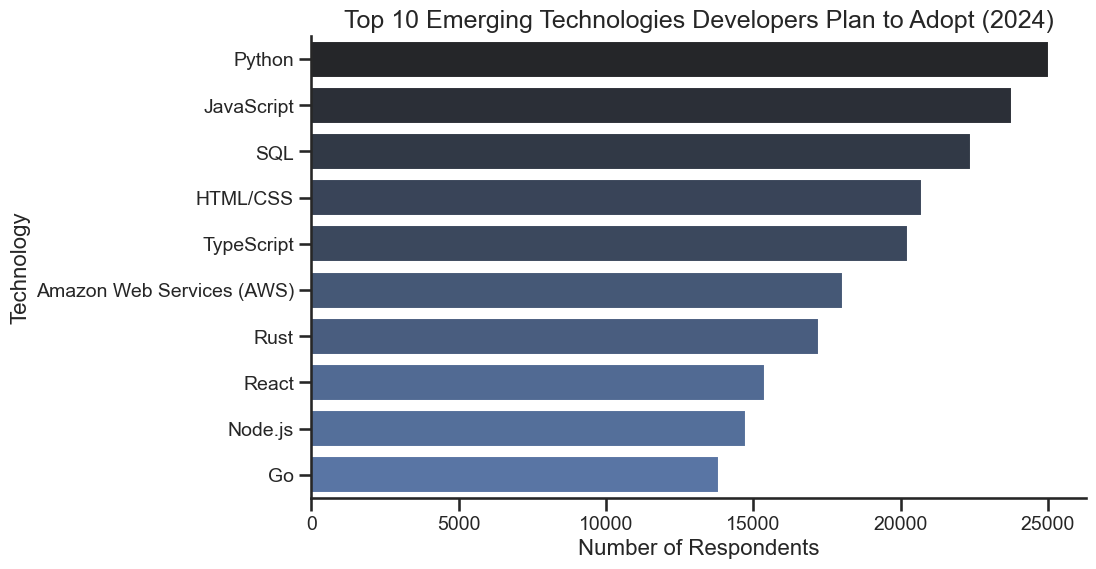

In [44]:
want_cols = ['LanguageWantToWorkWith', 'WebframeWantToWorkWith', 'PlatformWantToWorkWith', 'ToolsTechWantToWorkWith']

# Collect counts from each column if available.
emerging_counter = Counter()
for col in want_cols:
    if col in df.columns:
        emerging_counter.update(count_items(df[col]))

# Create a DataFrame and plot the top 10 emerging technologies.
emerging_df = pd.DataFrame(emerging_counter.items(), columns=['Technology', 'Count']).sort_values('Count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Technology', data=emerging_df.head(10), hue='Count', palette=palette)
plt.title("Top 10 Emerging Technologies Developers Plan to Adopt (2024)")
plt.xlabel("Number of Respondents")
plt.ylabel("Technology")
plt.legend().remove()
plt.show()

**Top Emerging Technologies Insights (2024)**

* **Established languages dominate "emerging" plans** with Python (~25,000 respondents) and JavaScript (~24,000) leading—suggesting developers prioritize deepening core skills over novel technologies
* **TypeScript's strong position** (~20,000) reflects the continued movement toward type safety in JavaScript ecosystems
* **Rust stands out** (~17,000) as the highest-ranked truly emerging language, signaling strong industry interest in memory safety and performance
* **AWS remains the cloud platform** of choice (~18,000), far outpacing any other cloud services (which don't appear in the top 10)
* **Go shows steady adoption momentum** (~14,000) as the second emerging systems language after Rust
* **React maintains frontend framework leadership** (~15,500) despite being a mature technology, suggesting continued high demand
* **Node.js adoption plans** (~15,000) indicate continued JavaScript ecosystem dominance for backend development
* **SQL's high position** (~22,000) reveals that many developers still need to adopt fundamental database skills despite its decades-long history

## **Cost of Living Integration and Analysis**

In [45]:
col_data.head()

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5


In [46]:
# Group by Country to compute the median compensation, count of responses, etc.
median_comp_by_country = df.groupby('Country').agg(
    MedianCompensation=('ConvertedCompYearly', 'median'),
    Count=('ResponseId', 'count')
).reset_index()

In [47]:
median_comp_by_country.head()

,Country,MedianCompensation,Count
0,Afghanistan,3438.0,56
1,Albania,35341.0,49
2,Algeria,7120.0,77
3,Andorra,123517.0,15
4,Angola,1754.0,20


In [48]:
# Merge median compensation with COL dataset on 'Country'
merged = pd.merge(median_comp_by_country, col_data, on='Country', how='left')

In [49]:
merged.head()

,Country,MedianCompensation,Count,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,Afghanistan,3438.0,56,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,35341.0,49,53.0,42.1,10.6,27.0,42.0,35.7,39.9
2,Algeria,7120.0,77,101.0,28.9,3.8,16.9,36.8,14.0,29.9
3,Andorra,123517.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1754.0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
# Drop rows where cost-of-living index is missing (if any)
merged = merged.dropna(subset=['Cost of Living Plus Rent Index', 'Local Purchasing Power Index'])

In [51]:
merged.head()

,Country,MedianCompensation,Count,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
1,Albania,35341.0,49,53.0,42.1,10.6,27.0,42.0,35.7,39.9
2,Algeria,7120.0,77,101.0,28.9,3.8,16.9,36.8,14.0,29.9
6,Argentina,30000.0,345,98.0,29.4,7.6,18.9,29.7,24.8,41.5
7,Armenia,27865.0,58,58.0,41.0,19.0,30.5,36.0,38.9,38.5
8,Australia,95465.5,1260,10.0,70.2,33.4,52.5,77.3,62.5,127.4


In [52]:
merged['AffordabilityScore'] = merged['MedianCompensation'] / merged['Cost of Living Plus Rent Index']

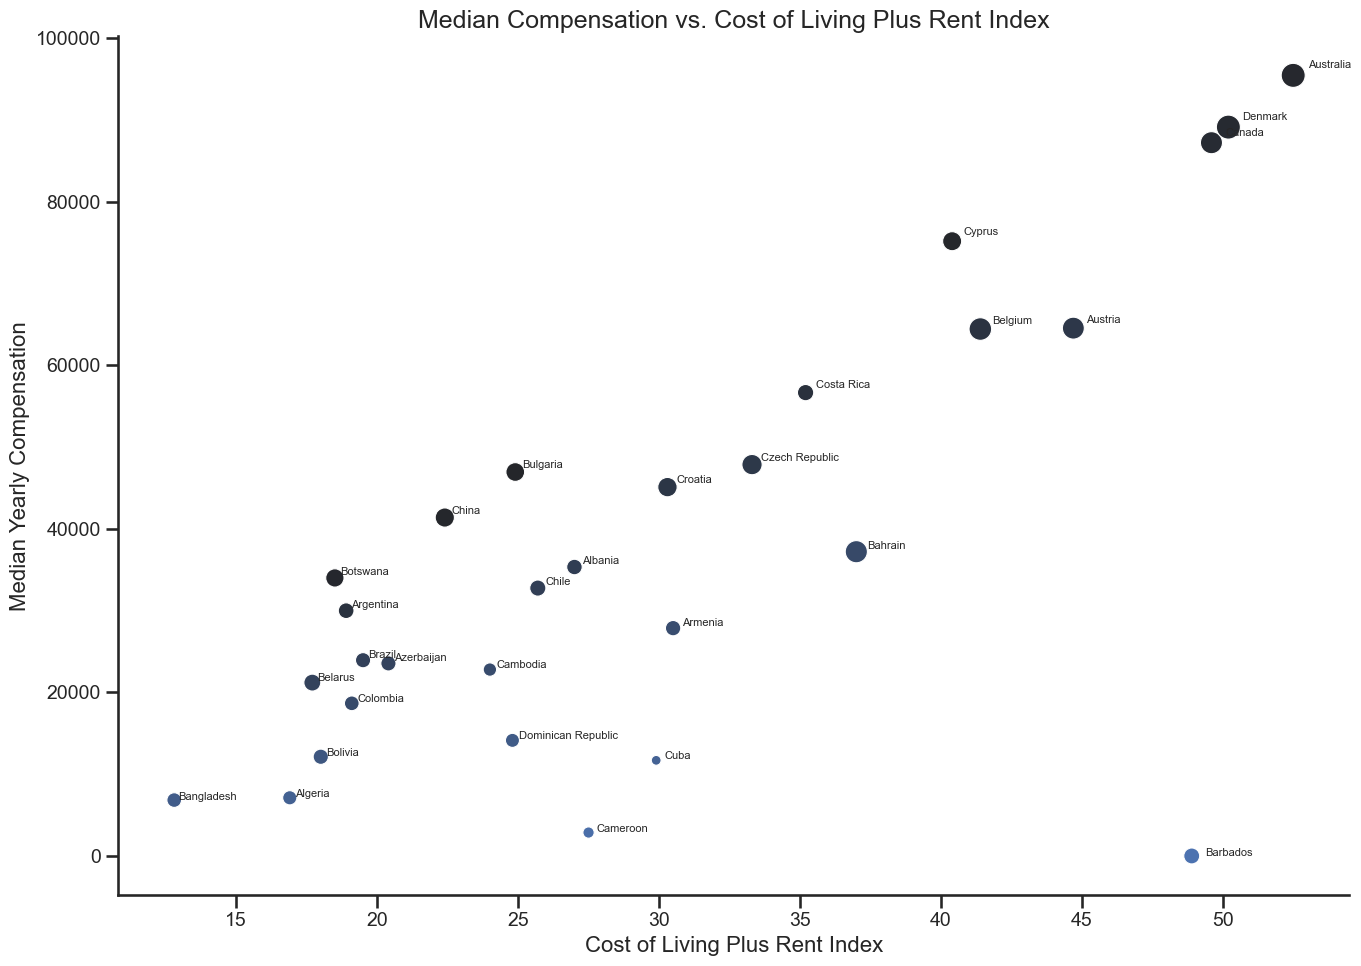

In [53]:
# A. Scatter Plot: Median Compensation vs Cost of Living Plus Rent Index
top_30 = merged.head(30)

plt.figure(figsize=(14, 10))
scatter = sns.scatterplot(data=top_30, x='Cost of Living Plus Rent Index', y='MedianCompensation',
                          size='Local Purchasing Power Index', hue='AffordabilityScore', sizes=(50, 300), palette=palette)
plt.title("Median Compensation vs. Cost of Living Plus Rent Index")
plt.xlabel("Cost of Living Plus Rent Index")
plt.ylabel("Median Yearly Compensation")
for i, row in top_30.iterrows():
    plt.text(row['Cost of Living Plus Rent Index']*1.01, row['MedianCompensation']*1.01, row['Country'], fontsize=8)
plt.legend().remove()
plt.tight_layout()
plt.show()

**Compensation vs. Cost of Living Insights**

* **Positive correlation exists** between cost of living and compensation, but with significant outliers offering advantageous ratios
* **High-income, high-COL cluster** (Australia, Denmark, Canada) shows expected pattern of elevated compensation (~$90K+) matching expensive living costs
* **Cost advantage champions** emerge in unexpected places:
  - **Cyprus** offers excellent compensation (~$75K) with moderate cost index (~38)
  - **Costa Rica** delivers strong compensation (~$57K) despite middle-range costs (~33)
  - **Bulgaria** presents exceptional value with good pay (~$47K) against low living costs (~22)
* **Stark economic disconnects** visible in certain regions:
  - **Barbados** shows the most extreme imbalance—highest cost index (~50) with near-zero compensation
  - **Cameroon and Cuba** demonstrate serious compensation deficits relative to their cost indices
* **China's efficiency** stands out with solid compensation (~$41K) despite relatively low cost index (~21)
* **Baltic states** (not individually labeled) cluster in the middle range with balanced compensation-to-cost ratios
* **Western European nations** predominantly occupy the upper-right quadrant, while South American countries generally fall in the lower-left

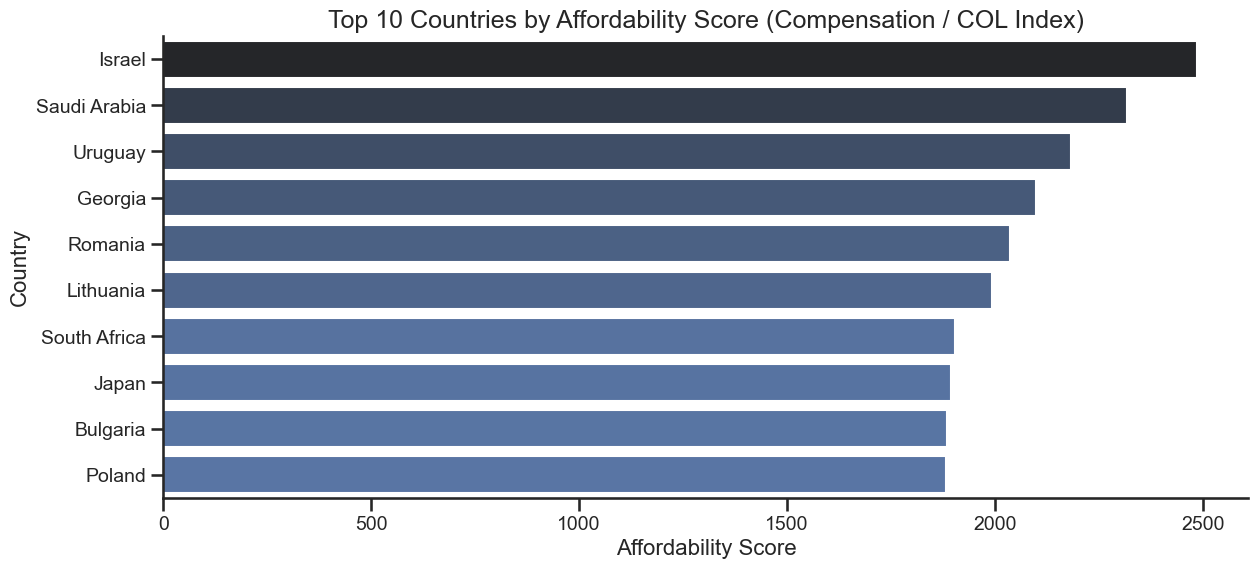

In [54]:
# B. Bar Plot: Affordability Score Ranking (Top 10)
top_affordable = merged.sort_values('AffordabilityScore', ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x='AffordabilityScore', y='Country', data=top_affordable, hue='AffordabilityScore', palette=palette)
plt.title("Top 10 Countries by Affordability Score (Compensation / COL Index)")
plt.xlabel("Affordability Score")
plt.ylabel("Country")
plt.legend().remove()
plt.show()

**Top Countries by Developer Affordability**

* **Israel leads decisively** with the highest affordability score (~2500), offering developers exceptional purchasing power relative to living costs
* **Middle East emerges as affordability leader** with Israel and Saudi Arabia (~2300) claiming the top two positions
* **Uruguay stands out** as Latin America's representative (~2200), significantly outperforming regional neighbors
* **Unexpected contenders** include Georgia (~2100) and Romania (~2050), demonstrating Eastern Europe's strong value proposition
* **Japan's inclusion** (~1900) is surprising given its reputation for high living costs, suggesting strong tech compensation relative to local expenses
* **Regional diversity** in the top 10 spans Middle East, Eastern Europe, Latin America, Asia, and Africa
* **Notably absent** are traditional tech powerhouses like the US, UK, and Western European nations—despite their high absolute compensation
* **Bulgaria's presence** (~1900) confirms its earlier standout position from the compensation-vs-cost scatter plot
* **Poland completes** the top 10 (~1900), highlighting Eastern Europe's overall strength in affordability
* **Strong showing from Baltic states** with Lithuania (~2000) ranking 6th

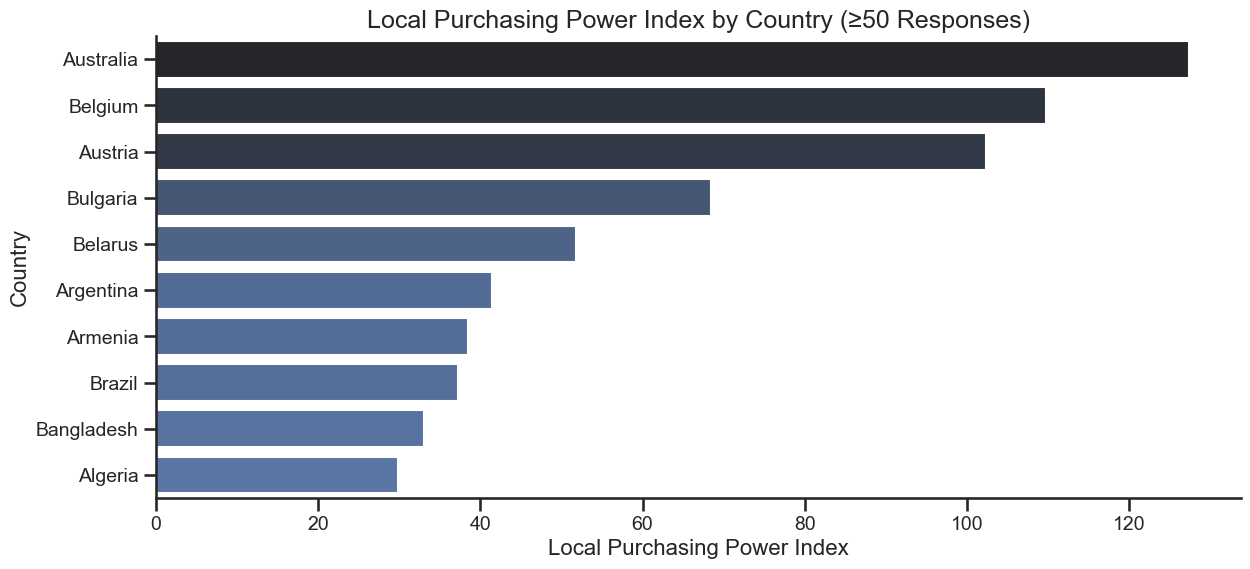

In [55]:
# C. Bar Plot: Median Compensation and Local Purchasing Power Comparison
filtered = merged[merged['Count'] >= 50].copy().head(10)
filtered = filtered.sort_values('Local Purchasing Power Index', ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(x='Local Purchasing Power Index', y='Country', data=filtered, hue='Local Purchasing Power Index',palette=palette)
plt.title("Local Purchasing Power Index by Country (≥50 Responses)")
plt.xlabel("Local Purchasing Power Index")
plt.ylabel("Country")
plt.legend().remove()
plt.show()

**Local Purchasing Power Insights by Country**

* **Stark economic divide** evident with developed nations holding 3-4× the purchasing power of emerging economies
* **Australia leads dramatically** (~130 index) with the highest developer purchasing power globally
* **Western European strength** shown by Belgium (~115) and Austria (~105) securing top positions
* **Bulgaria bridges the gap** (~75) between Western economies and emerging markets, offering strong relative value
* **Tight clustering** among lower-ranked countries (35-45 range) despite significant geographical and economic differences
* **Belarus outperforms** (~60) other former Soviet states, showing stronger developer economics than expected
* **Latin American struggle** evident with Argentina (~45) and Brazil (~40) showing limited purchasing power despite active tech scenes
* **Bangladesh and Algeria** rank lowest (~35 and ~30), highlighting severe limitations for local developers despite growing tech presence
* **Three distinct tiers** emerge: premium Western markets (100+), mid-range emerging tech hubs (60-80), and challenging markets (30-45)
* **Disparity reveals migration pressures** and explains global tech talent flow from bottom-tier to top-tier countries

## Conclusion

The Stack Overflow Developer Survey 2024 analysis provides a comprehensive view of the global developer ecosystem. Key findings include:

1. **Demographics**: The profession remains dominated by the 25-34 age bracket, with a significant influx of new developers (0-1 years professional experience), while bachelor's degrees remain the dominant educational credential.

2. **Technology Landscape**: JavaScript, HTML/CSS, Python and SQL form the core of the technology ecosystem, with Node.js and React dominating frameworks, and PostgreSQL leading databases.

3. **Work Environment**: Hybrid work has emerged as the dominant arrangement (~23,000 developers), with remote work following closely (~21,000). In-person arrangements now represent a minority (~11,000).

4. **Regional Variations**: Geographic location has a greater impact on compensation than years of experience, creating stark regional stratification in developer economics.

5. **Learning Patterns**: Informal online resources dominate developer learning (~48,000), while traditional education and books remain relevant (~30,000 each).

6. **Developer Roles**: Full-stack developers represent the largest segment (~18,000), nearly doubling backend specialists (~10,000), with frontend specialists showing surprisingly lower representation (~3,000).

7. **Cost of Living Integration**: When adjusted for cost of living, unexpected countries emerge as offering the best developer value, with Israel, Saudi Arabia, and Uruguay leading the affordability rankings.

8. **Future Trends**: Despite interest in newer technologies like Rust (~17,000) and Go (~14,000), the data indicates developers are primarily focused on deepening expertise in established technologies like Python, JavaScript, and SQL.

This analysis provides valuable insights for developers, employers, educators, and policy makers in understanding the current state and future direction of the global developer ecosystem.

## Methodology Notes

1. Data cleaning involved converting string representations to appropriate numeric types and handling missing values.
   
2. For multi-response fields (separated by semicolons), custom functions were used to split and count individual responses.

3. Geographic analysis focused primarily on countries with sufficient response volumes (typically 50+ responses) to ensure statistical validity.

4. Company categorization was performed using a custom function to group organization sizes into meaningful categories (Startup, Mid-sized, Enterprise).

5. Visualization approaches were standardized using a consistent color palette and style settings to maintain visual coherence throughout the analysis.